# Initial Data Exploration

In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import math

In [2]:
df = pl.read_csv('output.csv')

In [3]:
df.columns

['',
 'time',
 'AVG_PACK_SOC',
 'AvgSOC',
 'AvgSOH',
 'BATT_PACK_1_DISCONN',
 'BATT_PACK_1_FAULT',
 'BATT_PACK_1_WARN',
 'BATT_PACK_2_DISCONN',
 'BATT_PACK_2_FAULT',
 'BATT_PACK_2_WARN',
 'BATT_PACK_3_DISCONN',
 'BATT_PACK_3_FAULT',
 'BATT_PACK_3_WARN',
 'BATT_PACK_4_DISCONN',
 'BATT_PACK_4_FAULT',
 'BATT_PACK_4_WARN',
 'BATT_PACK_5_DISCONN',
 'BATT_PACK_5_FAULT',
 'BATT_PACK_5_WARN',
 'BATT_PACK_6_DISCONN',
 'BATT_PACK_6_FAULT',
 'BATT_PACK_6_WARN',
 'BATT_PACK_7_DISCONN',
 'BATT_PACK_7_FAULT',
 'BATT_PACK_7_WARN',
 'BATT_ROOM_TEMP',
 'Current',
 'MAX_CELL_TEMP',
 'MAX_CELL_VOL',
 'MAX_PACK_SOC',
 'MAX_UNCONN_PACK_VOL',
 'MIN_CELL_TEMP',
 'MIN_CELL_VOL',
 'MIN_PACK_SOC',
 'MIN_UNCONN_PACK_VOL',
 'NUMBER_OF_PACKS_CONN',
 'NUMBER_OF_PACKS_FAULTED',
 'PACK1_CRIDATA_AVG_CELL_TEMP',
 'PACK1_CRIDATA_AVG_CELL_VOL',
 'PACK1_CRIDATA_BATT_VOL',
 'PACK1_CRIDATA_BUS_VOL',
 'PACK1_CRIDATA_CHARGE_CURR_LIMIT',
 'PACK1_CRIDATA_CURR',
 'PACK1_CRIDATA_DISCHARGE_CURR_LIMIT',
 'PACK1_CRIDATA_SOC',
 'PACK

In [25]:
s = df['PACK1_CRIDATA_BATT_VOL']
s1 = s.cast(pl.Float32)

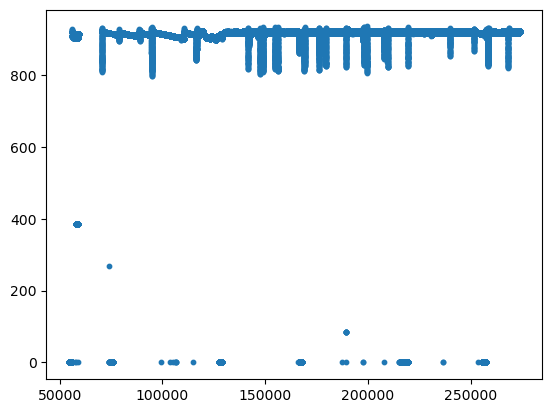

In [29]:
plt.scatter(range(len(s1)), s1, marker='o', s=10)

In [24]:
plt.scatter(s1.fill_null(strategy='backward'))

NameError: name 's1' is not defined

In [26]:
size = len(s1)


In [45]:
start_index = 0
# end_index = math.floor(size/2)
end_index = 60000

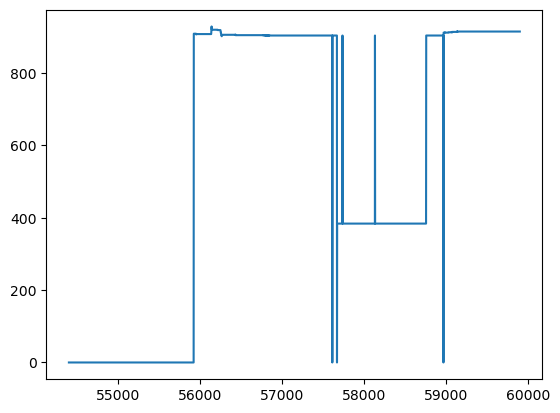

In [48]:
plt.plot(s1.fill_null(strategy='forward')[100:end_index])

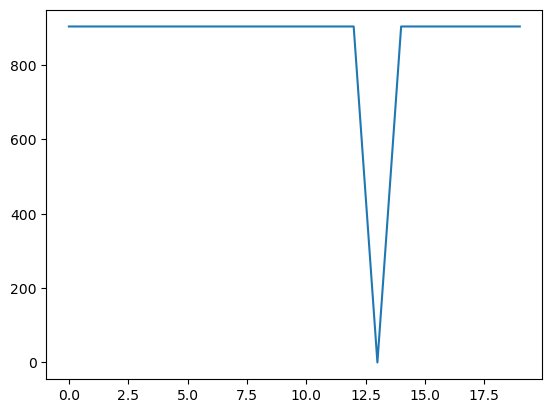

In [56]:

plt.plot(s1.fill_null(strategy='zero')[57700:57720])

Analysis: The voltage drops from 800 to 0 in a very short span of time. I doubt that it is due to the battery discharge, since it quickly resumes to its normal voltage

What is the time?

In [60]:
print(df['time'][57700])
print(df['time'][57701])
print(df['time'][57702])

2022-10-19T05:19:00Z
2022-10-19T05:20:00Z
2022-10-19T05:21:00Z


In [66]:
df.columns.index('PACK1_CRIDATA_BATT_VOL')

40

In [82]:
df.columns

['',
 'time',
 'AVG_PACK_SOC',
 'AvgSOC',
 'AvgSOH',
 'BATT_PACK_1_DISCONN',
 'BATT_PACK_1_FAULT',
 'BATT_PACK_1_WARN',
 'BATT_PACK_2_DISCONN',
 'BATT_PACK_2_FAULT',
 'BATT_PACK_2_WARN',
 'BATT_PACK_3_DISCONN',
 'BATT_PACK_3_FAULT',
 'BATT_PACK_3_WARN',
 'BATT_PACK_4_DISCONN',
 'BATT_PACK_4_FAULT',
 'BATT_PACK_4_WARN',
 'BATT_PACK_5_DISCONN',
 'BATT_PACK_5_FAULT',
 'BATT_PACK_5_WARN',
 'BATT_PACK_6_DISCONN',
 'BATT_PACK_6_FAULT',
 'BATT_PACK_6_WARN',
 'BATT_PACK_7_DISCONN',
 'BATT_PACK_7_FAULT',
 'BATT_PACK_7_WARN',
 'BATT_ROOM_TEMP',
 'Current',
 'MAX_CELL_TEMP',
 'MAX_CELL_VOL',
 'MAX_PACK_SOC',
 'MAX_UNCONN_PACK_VOL',
 'MIN_CELL_TEMP',
 'MIN_CELL_VOL',
 'MIN_PACK_SOC',
 'MIN_UNCONN_PACK_VOL',
 'NUMBER_OF_PACKS_CONN',
 'NUMBER_OF_PACKS_FAULTED',
 'PACK1_CRIDATA_AVG_CELL_TEMP',
 'PACK1_CRIDATA_AVG_CELL_VOL',
 'PACK1_CRIDATA_BATT_VOL',
 'PACK1_CRIDATA_BUS_VOL',
 'PACK1_CRIDATA_CHARGE_CURR_LIMIT',
 'PACK1_CRIDATA_CURR',
 'PACK1_CRIDATA_DISCHARGE_CURR_LIMIT',
 'PACK1_CRIDATA_SOC',
 'PACK

In [80]:
df.columns[38:47]

['PACK1_CRIDATA_AVG_CELL_TEMP',
 'PACK1_CRIDATA_AVG_CELL_VOL',
 'PACK1_CRIDATA_BATT_VOL',
 'PACK1_CRIDATA_BUS_VOL',
 'PACK1_CRIDATA_CHARGE_CURR_LIMIT',
 'PACK1_CRIDATA_CURR',
 'PACK1_CRIDATA_DISCHARGE_CURR_LIMIT',
 'PACK1_CRIDATA_SOC',
 'PACK1_CRIDATA_SOH']

In [95]:
df[57712:57715, 38:47].melt

<bound method DataFrame.melt of shape: (3, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ PACK1_CRI ┆ PACK1_CRI ┆ PACK1_CRI ┆ PACK1_CRI ┆ … ┆ PACK1_CRI ┆ PACK1_CRI ┆ PACK1_CRI ┆ PACK1_CR │
│ DATA_AVG_ ┆ DATA_AVG_ ┆ DATA_BATT ┆ DATA_BUS_ ┆   ┆ DATA_CURR ┆ DATA_DISC ┆ DATA_SOC  ┆ IDATA_SO │
│ CELL_TEMP ┆ CELL_VOL  ┆ _VOL      ┆ VOL       ┆   ┆ ---       ┆ HARGE_CUR ┆ ---       ┆ H        │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ str       ┆ R_LIM…    ┆ str       ┆ ---      │
│ str       ┆ str       ┆ str       ┆ str       ┆   ┆           ┆ ---       ┆           ┆ str      │
│           ┆           ┆           ┆           ┆   ┆           ┆ str       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 26.0      ┆ 3961.0    ┆ 904.0     ┆ 0.0       ┆ … ┆ 0.0       ┆ 471.0     ┆ 80.0      ┆ 100.0    │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0    

In [96]:
df[57712:57715, 5:8].melt

<bound method DataFrame.melt of shape: (3, 3)
┌─────────────────────┬───────────────────┬──────────────────┐
│ BATT_PACK_1_DISCONN ┆ BATT_PACK_1_FAULT ┆ BATT_PACK_1_WARN │
│ ---                 ┆ ---               ┆ ---              │
│ str                 ┆ str               ┆ str              │
╞═════════════════════╪═══════════════════╪══════════════════╡
│ True                ┆ False             ┆ False            │
│ null                ┆ null              ┆ null             │
│ True                ┆ False             ┆ False            │
└─────────────────────┴───────────────────┴──────────────────┘>

Turns out it was just a missing data row

In [88]:
df['BATT_PACK_1_DISCONN'].value_counts()

BATT_PACK_1_DISCONN,counts
str,u32
"""False""",150260
"""True""",51769
null,71932


A strategy we can employ is to try to convert all 0 values in voltage to their neighbor values (interpolate)

## Finding anomalies

In [9]:
df['PACK_1_STATUS'].value_counts()

PACK_1_STATUS,counts
str,u32
null,66165
"""1.0""",56
"""274.0""",1
"""100.0""",1
"""0.0""",207738


In [11]:
df['BATT_PACK_1_DISCONN'].value_counts()

BATT_PACK_1_DISCONN,counts
str,u32
"""False""",150260
null,71932
"""True""",51769


In [13]:
df['BATT_PACK_1_FAULT'].value_counts()

BATT_PACK_1_FAULT,counts
str,u32
"""False""",137042
null,136820
"""True""",99


In [14]:
df['BATT_PACK_1_WARN'].value_counts()

BATT_PACK_1_WARN,counts
str,u32
"""True""",148
null,131051
"""False""",142762


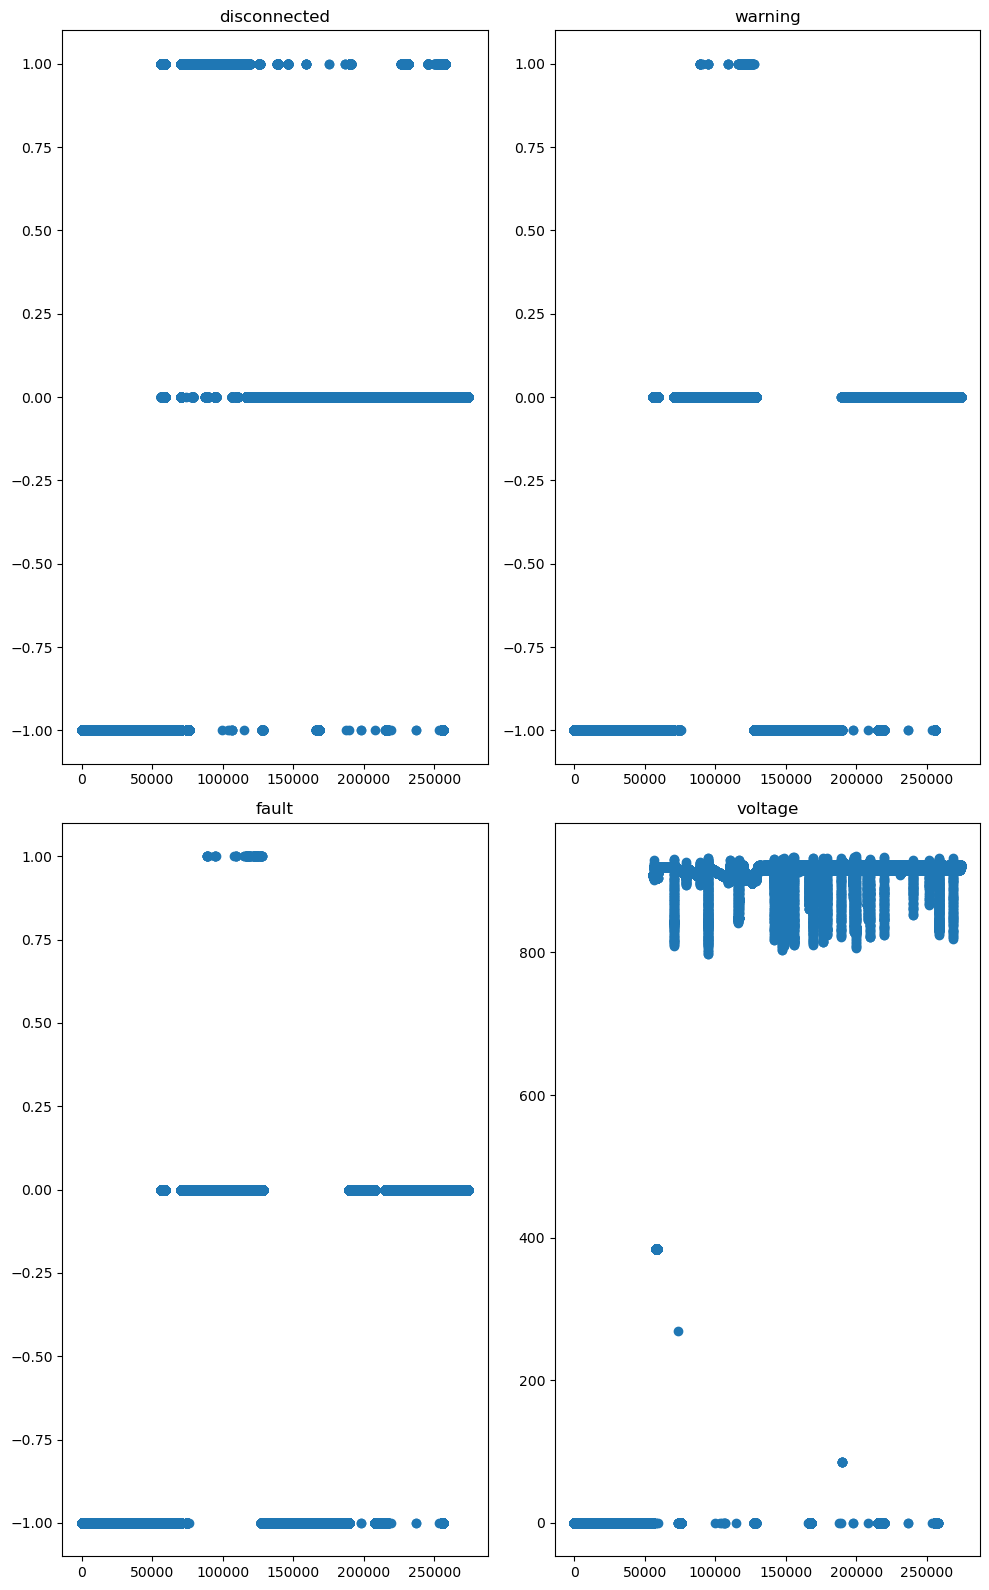

In [5]:

def convert_values(values):
    numerical_values = []
    for value in values:
        if value == 'False':
            numerical_values.append(0)
        elif value == 'True':
            numerical_values.append(1)
        else:
            numerical_values.append(-1)
    return numerical_values


numerical_values1 = convert_values(df['BATT_PACK_1_DISCONN'])
numerical_values2 = convert_values(df['BATT_PACK_1_WARN'])
numerical_values3 = convert_values(df['BATT_PACK_1_FAULT'])
numerical_values4 = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(strategy='backward')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axs[0,0].scatter(range(len(numerical_values1)), numerical_values1)
axs[0,0].set_title("disconnected")
axs[0,1].scatter(range(len(numerical_values2)), numerical_values2)
axs[0,1].set_title("warning")
axs[1,0].scatter(range(len(numerical_values3)), numerical_values3)
axs[1,0].set_title("fault")
axs[1,1].scatter(range(len(numerical_values4)), numerical_values4)
axs[1,1].set_title("voltage")


plt.tight_layout()
plt.show()

(800.0, 1000.0)

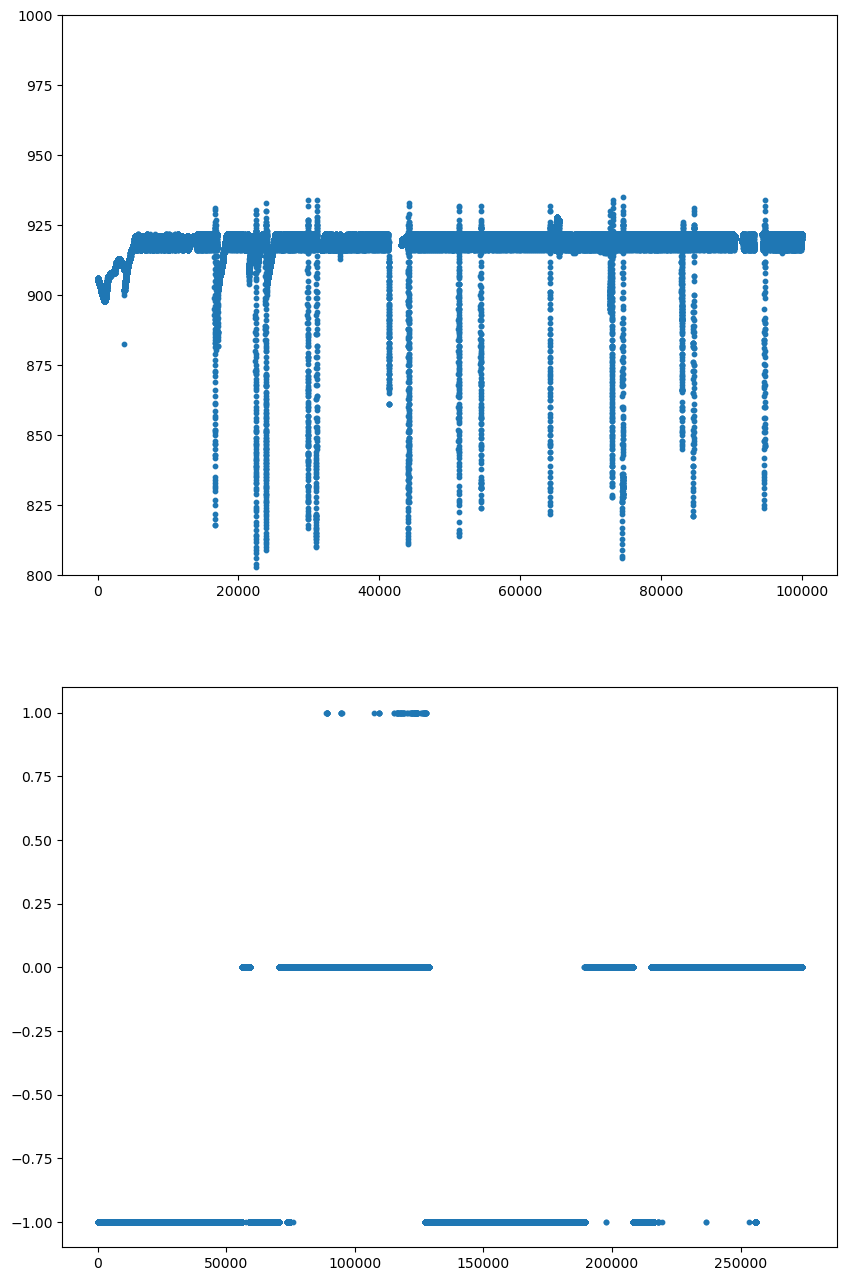

In [56]:
start = 125000

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,16))

numerical_values1 = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(strategy='mean')[start:start+100000]
numerical_values2 = convert_values(df['BATT_PACK_1_FAULT'])
axs[0].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[0].set_ylim(800,1000)

## charge discharge

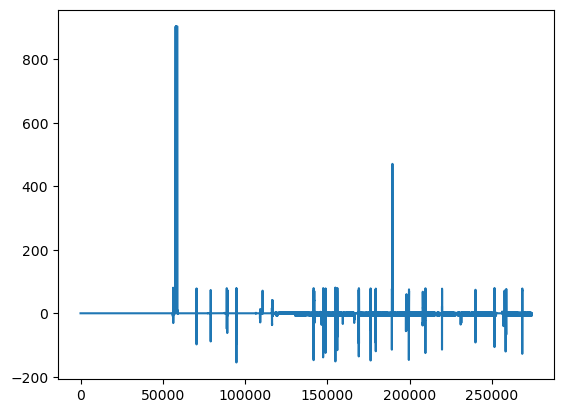

In [60]:
plt.plot(df['PACK1_CRIDATA_CURR'].cast(pl.Float32).fill_null(0))

Text(0.5, 1.0, 'voltage')

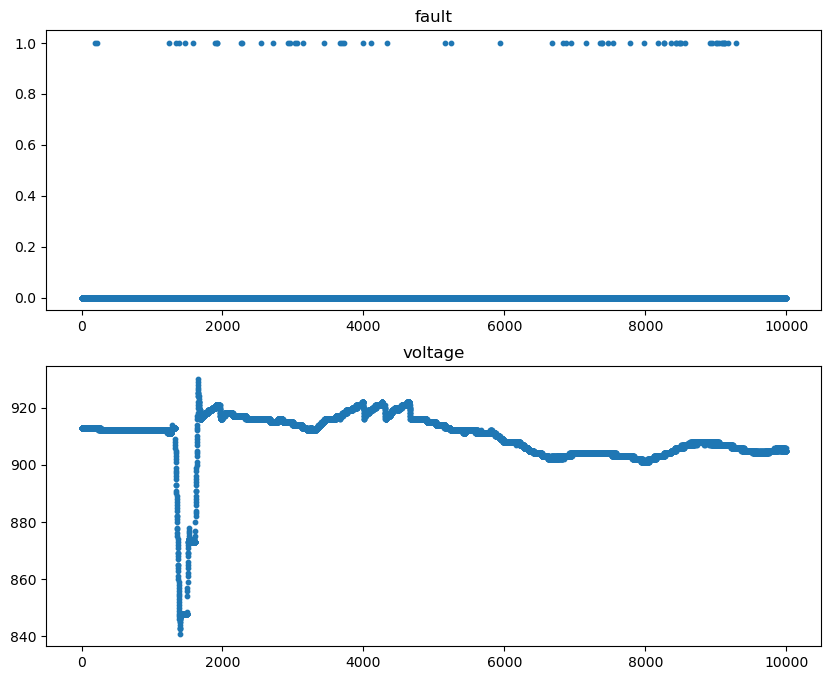

In [28]:
start = 115000
end = start + 10000

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

numerical_values0 = convert_values(df['BATT_PACK_1_FAULT'][start:end])
numerical_values1 = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(-100)[start:end]
axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault")
axs[1].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[1].set_title("voltage")


Text(0.5, 1.0, 'voltage')

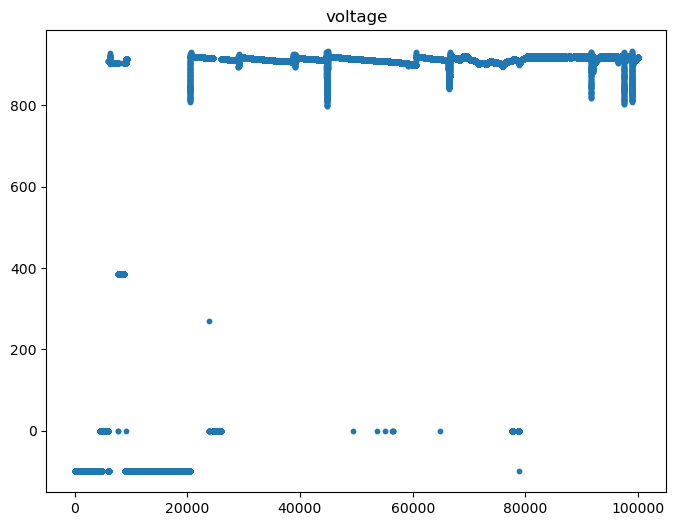

In [46]:
start = 50000
end = start + 100000
plt.figure(figsize=(8, 6))
numerical_values = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(-100)[start:end]
plt.scatter(range(len(numerical_values)), numerical_values, s=10)
plt.title("voltage")

Text(0.5, 1.0, 'voltage')

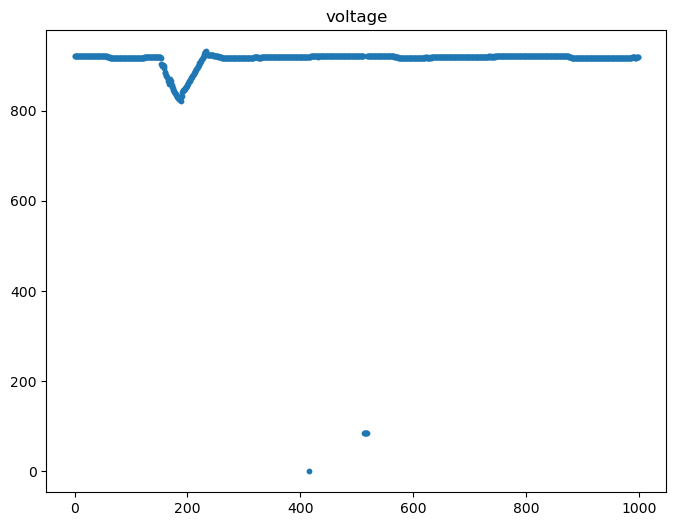

In [41]:
start = 189000
end = start + 1000
plt.figure(figsize=(8, 6))
numerical_values = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(-100)[start:end]
plt.scatter(range(len(numerical_values)), numerical_values, s=10)
plt.title("voltage")

Text(0.5, 1.0, 'temperature')

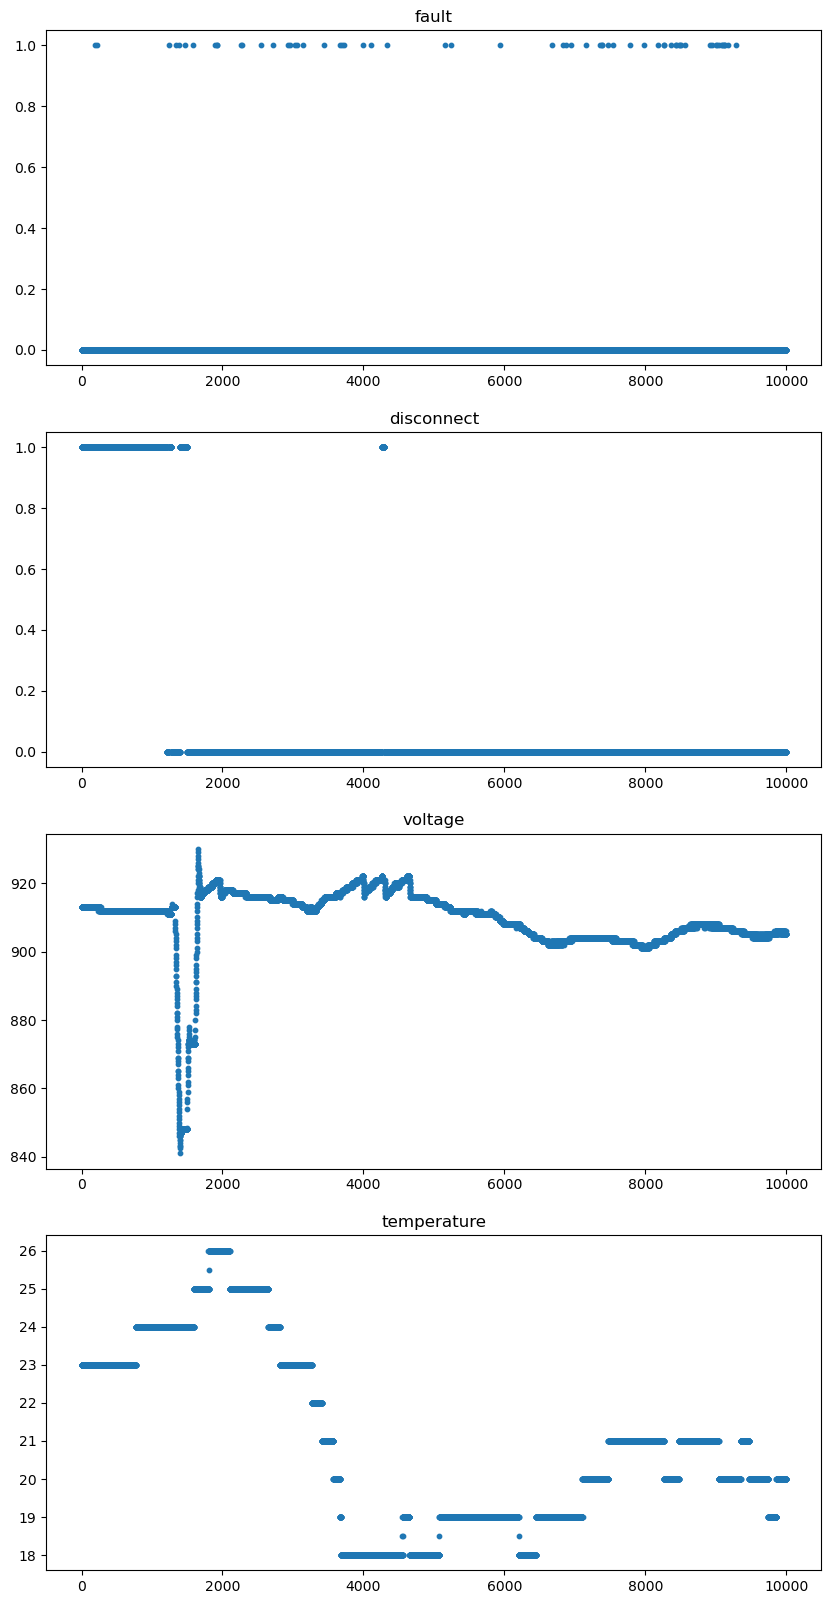

In [ ]:
end = start + 10000

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,20))

numerical_values0 = convert_values(df['BATT_PACK_1_FAULT'][start:end])
numerical_values1 = convert_values(df['BATT_PACK_1_DISCONN'][start:end])
numerical_values2 = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values3 = df['PACK1_CRIDATA_AVG_CELL_TEMP'].cast(pl.Float32).fill_null(-100)[start:end]
axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault")
axs[1].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].set_title("disconnect")
axs[2].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].set_title("voltage")
axs[3].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[3].set_title("temperature")

Text(0.5, 1.0, 'temperature')

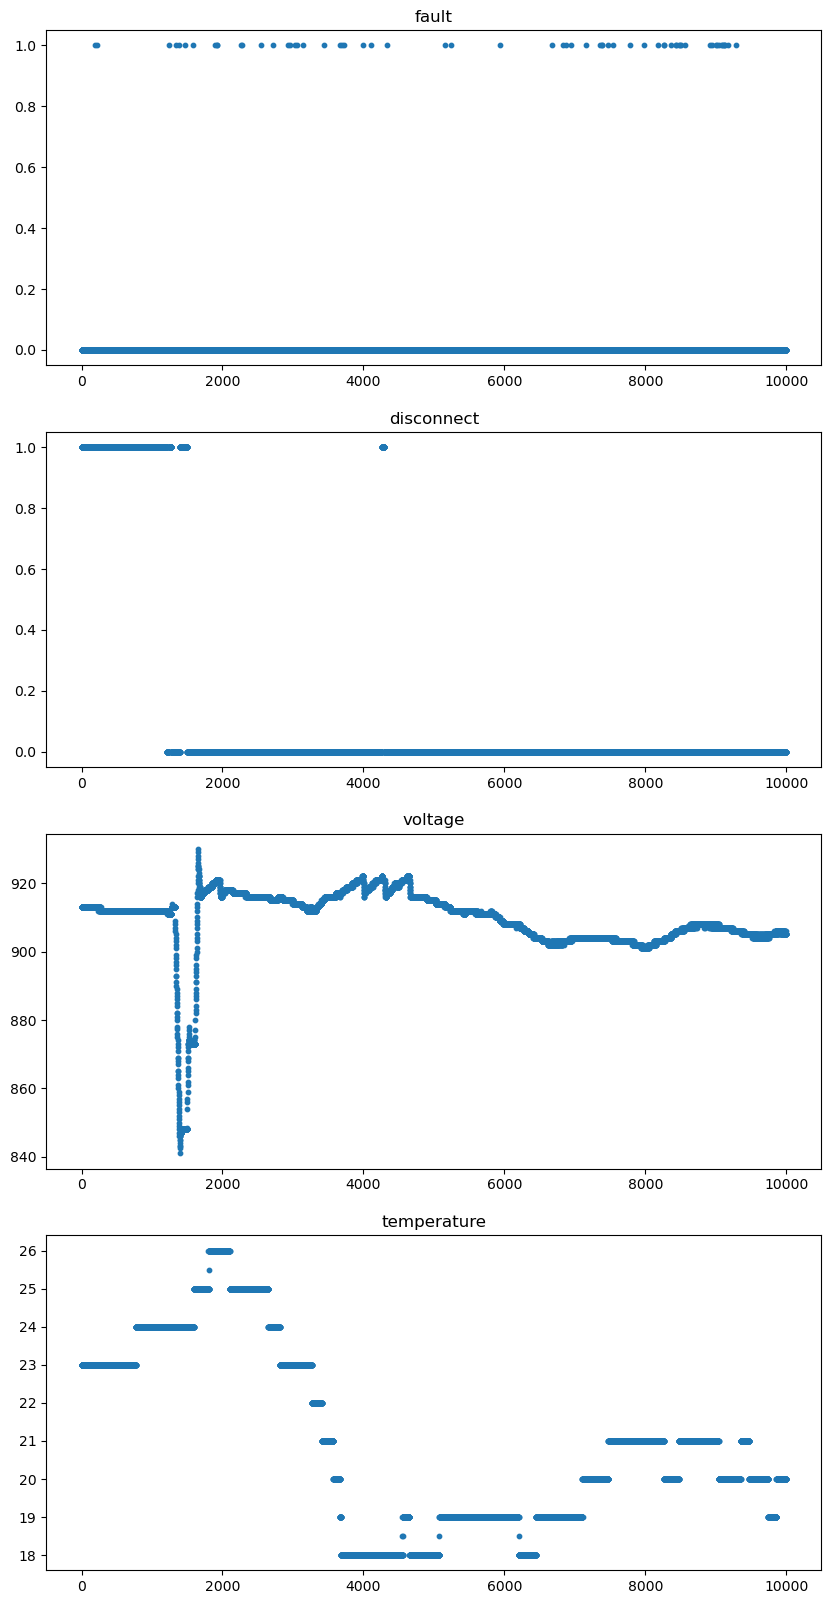

In [ ]:
start = 115000
end = start + 10000

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,20))

numerical_values0 = convert_values(df['BATT_PACK_1_FAULT'][start:end])
numerical_values1 = convert_values(df['BATT_PACK_1_DISCONN'][start:end])
numerical_values2 = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values3 = df['PACK1_CRIDATA_AVG_CELL_TEMP'].cast(pl.Float32).fill_null(-100)[start:end]
axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault")
axs[1].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].set_title("disconnect")
axs[2].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].set_title("voltage")
axs[3].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[3].set_title("temperature")

## temperature?

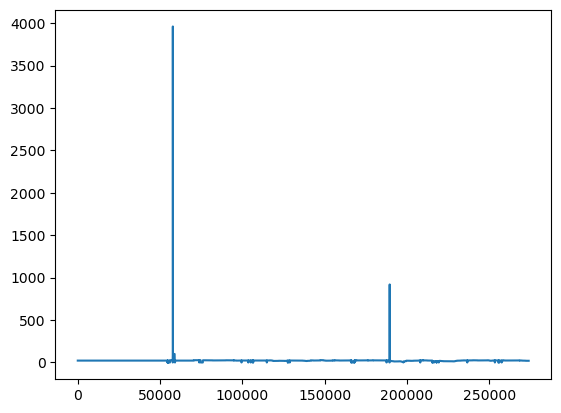

In [69]:

plt.plot(df['PACK1_CRIDATA_AVG_CELL_TEMP'].cast(pl.Float32).fill_null(strategy='mean'))

(800.0, 1000.0)

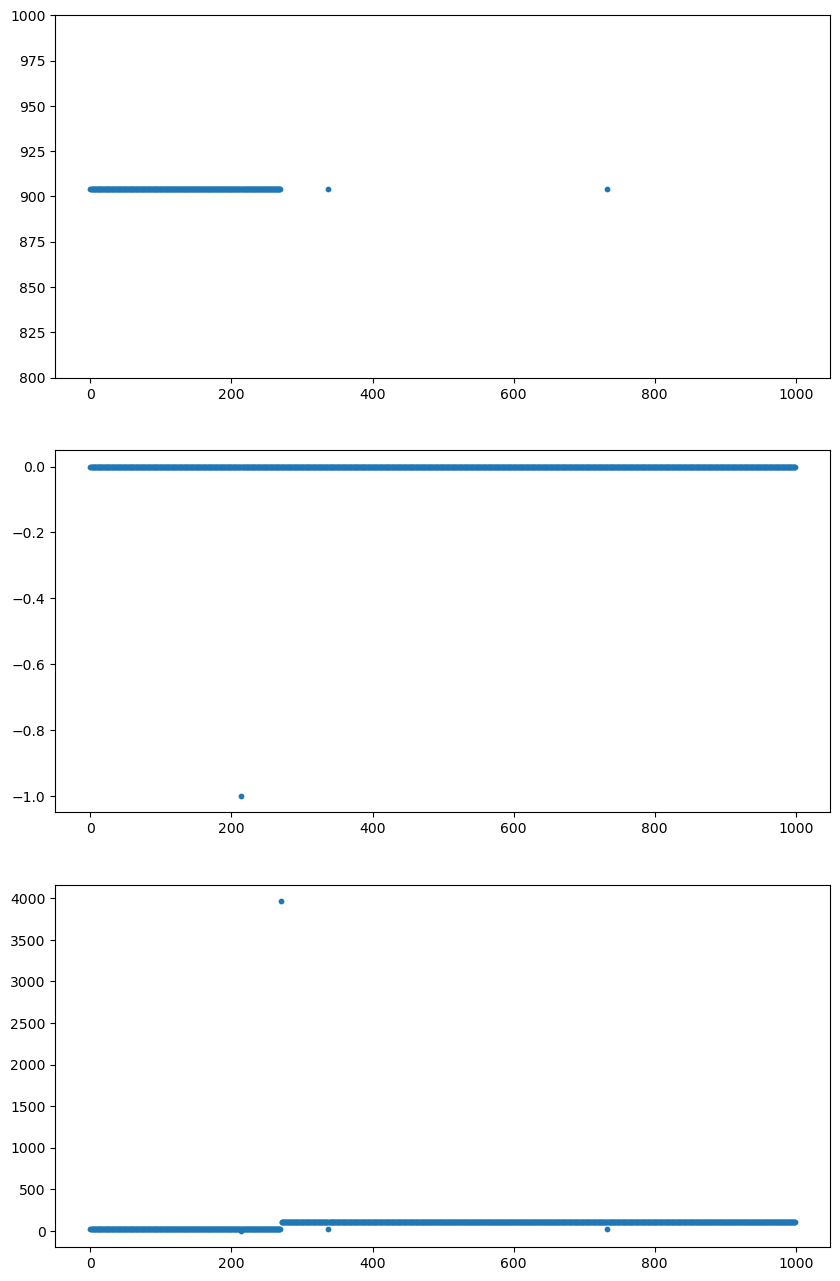

In [76]:
start = 50000 + 7500
end = start + 1000

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,16))

numerical_values1 = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(strategy='mean')[start:end]
numerical_values2 = convert_values(df['BATT_PACK_1_FAULT'])[start:end]
numerical_values3 = df['PACK1_CRIDATA_AVG_CELL_TEMP'].cast(pl.Float32).fill_null(strategy='mean')[start:end]
axs[0].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[0].set_ylim(800,1000)

## SOH and SOC

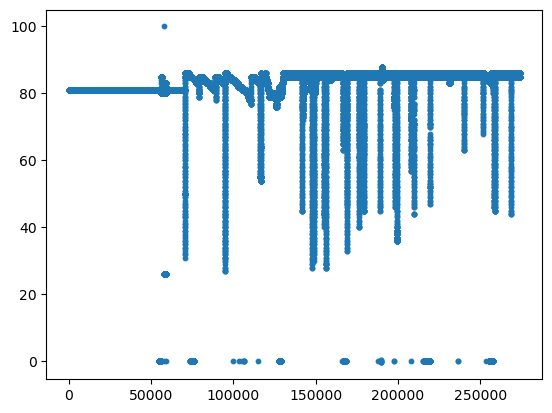

In [84]:
series = df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(strategy='mean')
plt.scatter(range(len(series)), series, s=10)

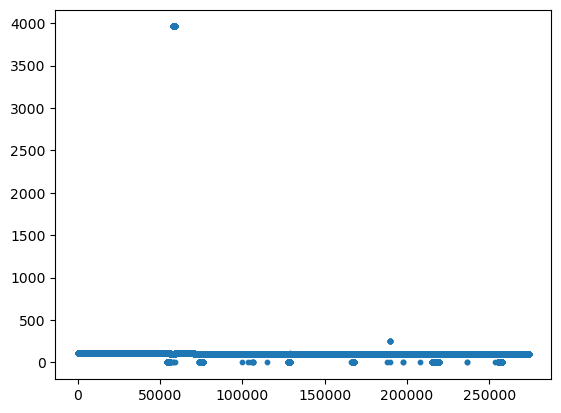

In [108]:
series = df['PACK1_CRIDATA_SOH'].cast(pl.Float32).fill_null(strategy='mean')
plt.scatter(range(len(series)), series, s=10)

We need to remove outlier data points (e.g. 4000)

## find discharge zones

The idea is to have 2 moving average windows, and then find if the moving window ahead is lower than the moving window before.

In [115]:
window_size = 10
series = df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(strategy='mean')
moving_avg = series.rolling_mean(window_size=window_size)

In [119]:
print(moving_avg.describe())

print(series.describe())

shape: (9, 2)
┌────────────┬───────────┐
│ statistic  ┆ value     │
│ ---        ┆ ---       │
│ str        ┆ f64       │
╞════════════╪═══════════╡
│ count      ┆ 273961.0  │
│ null_count ┆ 9.0       │
│ mean       ┆ 80.893529 │
│ std        ┆ 13.902372 │
│ min        ┆ 0.0       │
│ 25%        ┆ 80.893616 │
│ 50%        ┆ 85.0      │
│ 75%        ┆ 85.0      │
│ max        ┆ 88.0      │
└────────────┴───────────┘
shape: (9, 2)
┌────────────┬───────────┐
│ statistic  ┆ value     │
│ ---        ┆ ---       │
│ str        ┆ f64       │
╞════════════╪═══════════╡
│ count      ┆ 273961.0  │
│ null_count ┆ 0.0       │
│ mean       ┆ 80.893613 │
│ std        ┆ 13.989593 │
│ min        ┆ -0.299927 │
│ 25%        ┆ 80.893616 │
│ 50%        ┆ 85.0      │
│ 75%        ┆ 85.0      │
│ max        ┆ 100.0     │
└────────────┴───────────┘


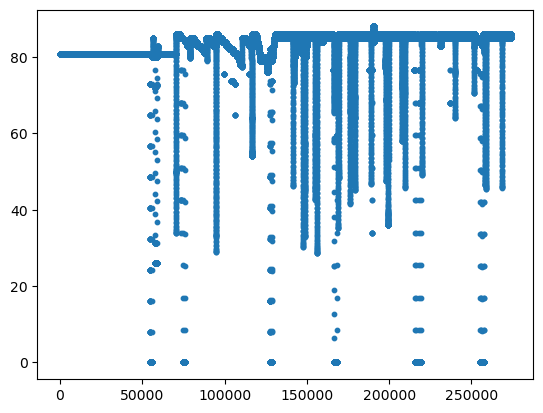

In [122]:
plt.scatter(range(len(moving_avg)),moving_avg, s=10)

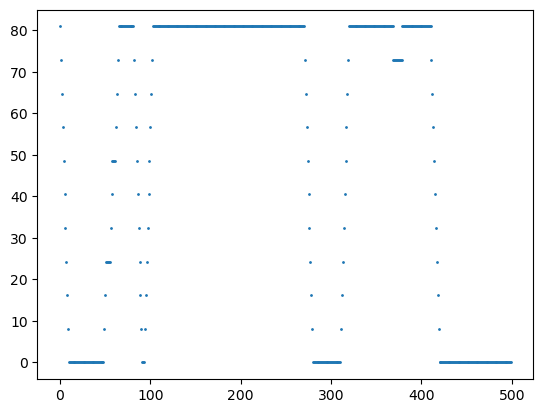

In [134]:
subset = moving_avg[54500:55000]
plt.scatter(range(len(subset)),subset, s=1)

We can see that we get artifacts of the moving averages because the data is not clean

(800.0, 1000.0)

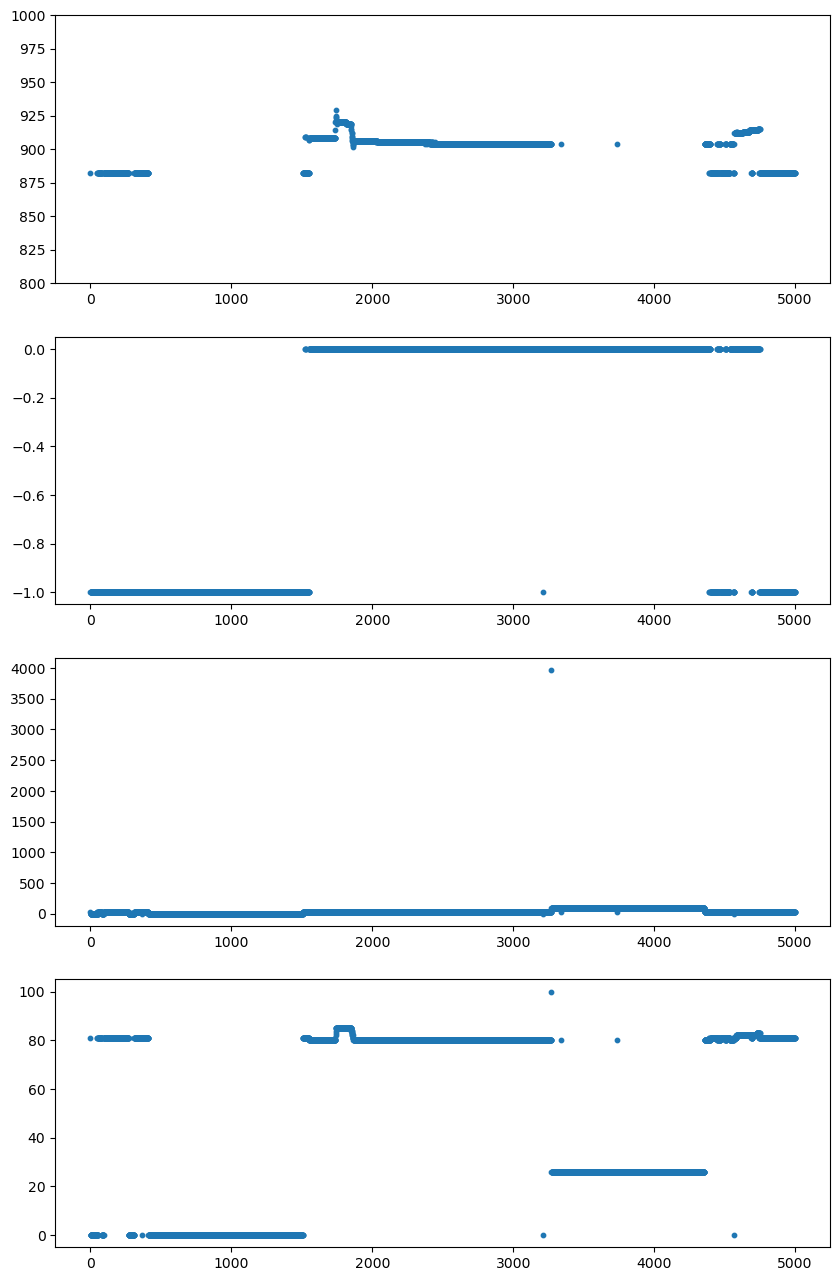

In [137]:
start = 54500
end = start + 5000

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,16))
numerical_values1 = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(strategy='mean')[start:end]
numerical_values2 = convert_values(df['BATT_PACK_1_FAULT'])[start:end]
numerical_values3 = df['PACK1_CRIDATA_AVG_CELL_TEMP'].cast(pl.Float32).fill_null(strategy='mean')[start:end]
numerical_values4 = df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(strategy='mean')[start:end]
axs[0].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[3].scatter(range(len(numerical_values4)), numerical_values4, s=10)
axs[0].set_ylim(800,1000)

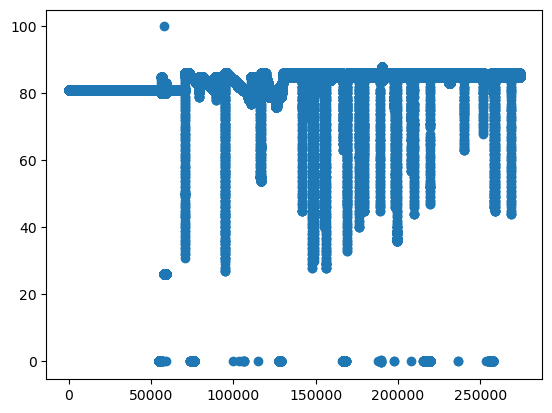

In [138]:
series = df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(strategy='mean')
plt.scatter(range(len(series)), series)

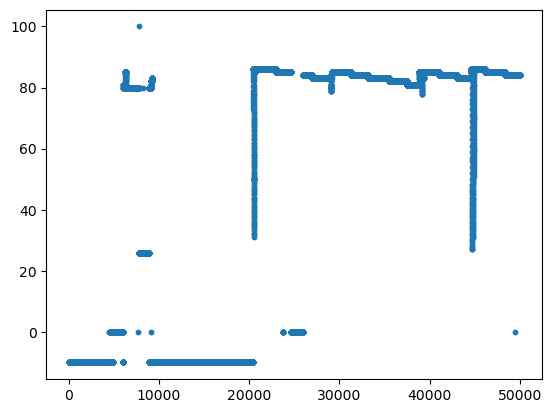

In [143]:
# reset df
series = df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(-10)


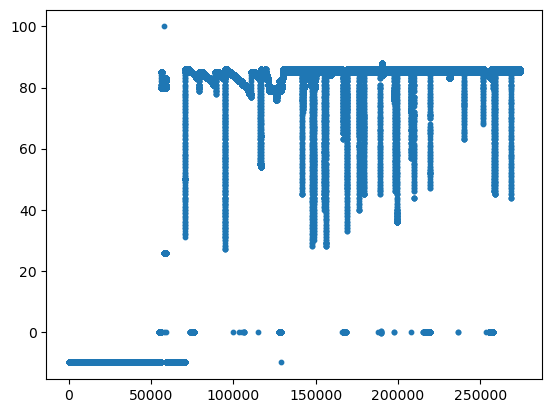

In [147]:
# start = 50000
# end = start + 10000
start = 0
end = len(df)
window = series[start:end]
plt.scatter(range(len(window)), window, s=10)

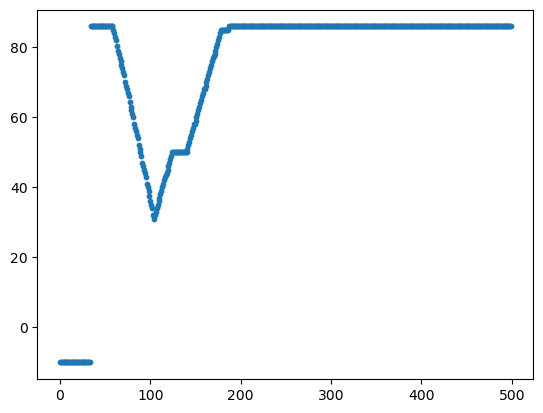

In [153]:
start = 70400
end = start + 500
window = series[start:end]
plt.scatter(range(len(window)), window, s=10)

Good news is that the data makes sense. It discharges in about 40 minutes, then charges back up in the same amount of time

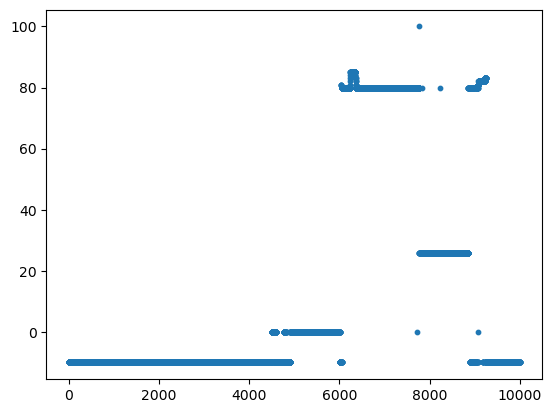

In [155]:
start = 50000
end = start + 10000
window = series[start:end]
plt.scatter(range(len(window)), window, s=10)

## strategy

We are going to identify periods of discharge/charge, then try to interpolate missing data in those intervals

Large periods of missing data usually correspond to idle times

In [6]:
window_size = 10
# moving_avg = (df['PACK1_CRIDATA_SOC'].cast(pl.Float32)
#                                      .fill_null(-10)
#                                      .rolling_mean(window_size=window_size)
#                                      .fill_null(-10))
moving_avg = df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(-10)

# moving_std = (df['PACK1_CRIDATA_SOC'].cast(pl.Float32)
#                                     .fill_null(-10)
#                                     .rolling_std(window_size=window_size)
#                                     .fill_null(10))

downward_segments = []
threshold_long = 10
threshold_short = 0.1
# smoothness = 3.0
segment_start = None


for i in range(len(df)):
    if ((moving_avg[i] - moving_avg[i - 1] > threshold_short) and 
        (moving_avg[i] - moving_avg[i - 1] < threshold_long)):
        # activate flag upon first contact
        if segment_start is None:
            segment_start = i - window_size + 1
    # at end of downward movement, reset flag
    elif segment_start is not None:
        segment_end = i
        downward_segments.append((segment_start, segment_end))
        segment_start = None
    

In [8]:
# reset df
series = df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(-10)


In [255]:
time = range(len(df))
for start, end in downward_segments:
    plt.fill_betweenx(series, start, end, color='green', alpha=0.3)
plt.xlim(0, len(df))
plt.scatter(range(len(series)), series)

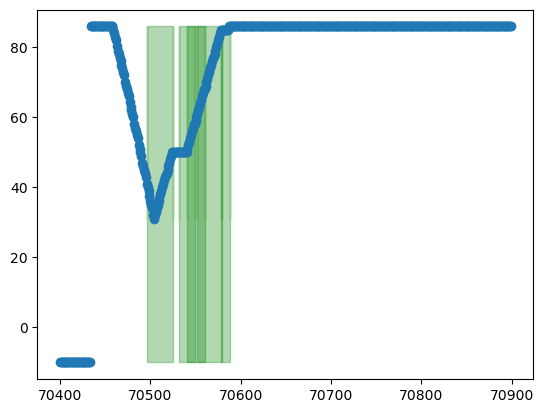

In [9]:
start_time = 70000 + 400; end_time = start_time + 500
sampled_segments = [(segment_start, segment_end) for segment_start, segment_end in downward_segments if ((segment_start > start_time) and (segment_end < end_time))]
for start, end in sampled_segments:
    plt.fill_betweenx(series[start_time:end_time], start, end, color='green', alpha=0.3)
# plt.xlim(0, len(df[start:end]))
plt.scatter(range(start_time,end_time), series[start_time:end_time])

In [195]:
sampled_segments

[]

# What are faults associated with?

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import math
df = pl.read_csv('output.csv')

In [209]:
df.columns

['',
 'time',
 'AVG_PACK_SOC',
 'AvgSOC',
 'AvgSOH',
 'BATT_PACK_1_DISCONN',
 'BATT_PACK_1_FAULT',
 'BATT_PACK_1_WARN',
 'BATT_PACK_2_DISCONN',
 'BATT_PACK_2_FAULT',
 'BATT_PACK_2_WARN',
 'BATT_PACK_3_DISCONN',
 'BATT_PACK_3_FAULT',
 'BATT_PACK_3_WARN',
 'BATT_PACK_4_DISCONN',
 'BATT_PACK_4_FAULT',
 'BATT_PACK_4_WARN',
 'BATT_PACK_5_DISCONN',
 'BATT_PACK_5_FAULT',
 'BATT_PACK_5_WARN',
 'BATT_PACK_6_DISCONN',
 'BATT_PACK_6_FAULT',
 'BATT_PACK_6_WARN',
 'BATT_PACK_7_DISCONN',
 'BATT_PACK_7_FAULT',
 'BATT_PACK_7_WARN',
 'BATT_ROOM_TEMP',
 'Current',
 'MAX_CELL_TEMP',
 'MAX_CELL_VOL',
 'MAX_PACK_SOC',
 'MAX_UNCONN_PACK_VOL',
 'MIN_CELL_TEMP',
 'MIN_CELL_VOL',
 'MIN_PACK_SOC',
 'MIN_UNCONN_PACK_VOL',
 'NUMBER_OF_PACKS_CONN',
 'NUMBER_OF_PACKS_FAULTED',
 'PACK1_CRIDATA_AVG_CELL_TEMP',
 'PACK1_CRIDATA_AVG_CELL_VOL',
 'PACK1_CRIDATA_BATT_VOL',
 'PACK1_CRIDATA_BUS_VOL',
 'PACK1_CRIDATA_CHARGE_CURR_LIMIT',
 'PACK1_CRIDATA_CURR',
 'PACK1_CRIDATA_DISCHARGE_CURR_LIMIT',
 'PACK1_CRIDATA_SOC',
 'PACK

In [6]:
def convert_values(values):
    numerical_values = []
    for value in values:
        if value == 'False':
            numerical_values.append(0)
        elif value == 'True':
            numerical_values.append(1)
        else:
            # numerical_values.append(np.nan)
            numerical_values.append(-1)
    return numerical_values



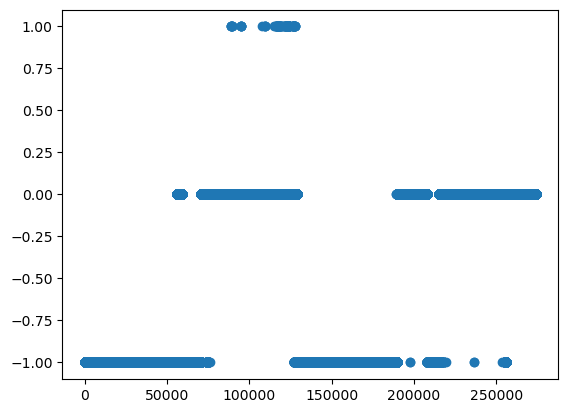

In [7]:
fault = convert_values(df['BATT_PACK_1_FAULT'])
plt.scatter(range(len(fault)), fault)

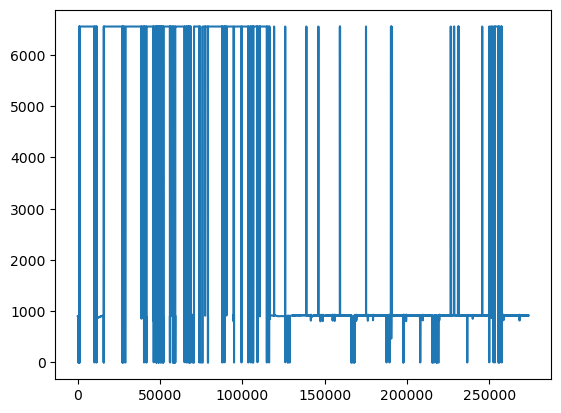

In [189]:
plt.plot(df['Voltage'].cast(pl.Float32))

We see that faults are constrained to between 50000 and 150000

## overview

Text(0.5, 1.0, 'batt room temp')

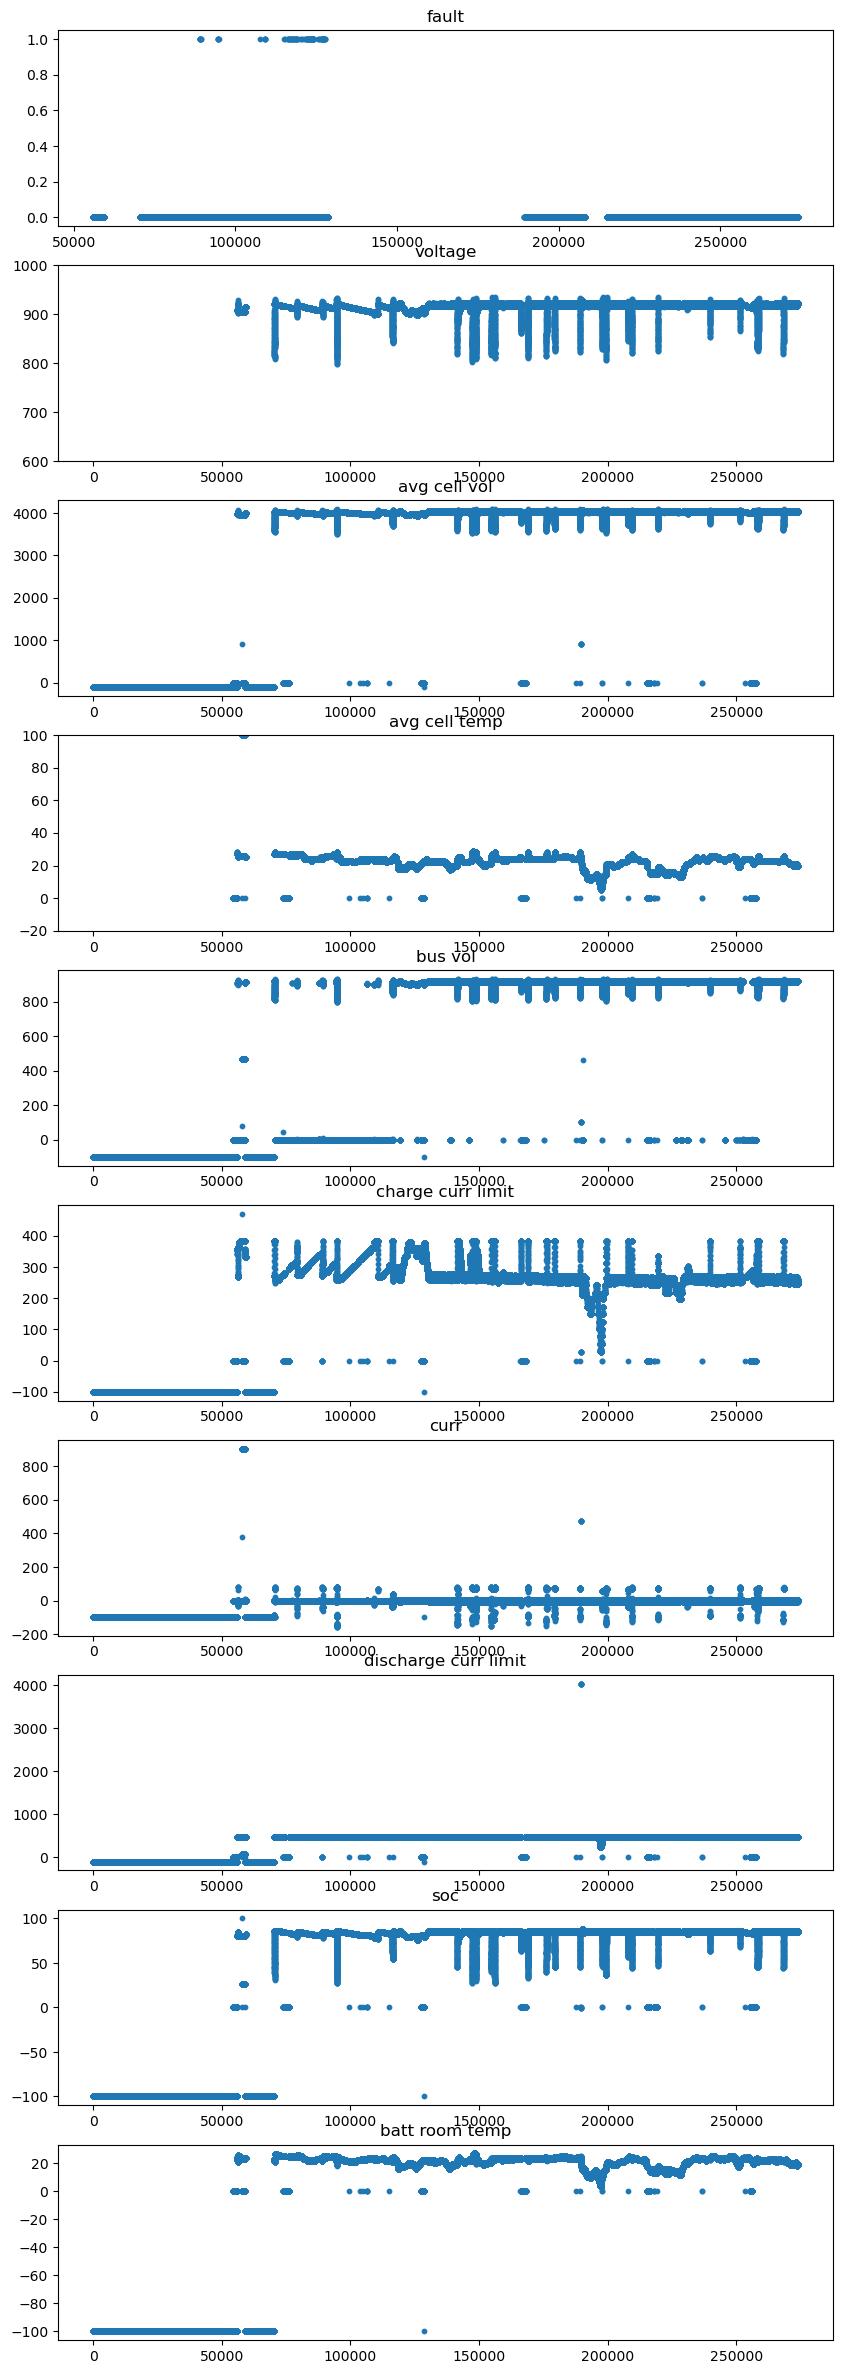

In [176]:
# start = 115000
# end = 140000
start = 0
end = len(df)
#

num_rows = 10
fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(10,3 * num_rows))

numerical_values0 = convert_values(df['BATT_PACK_1_FAULT'][start:end])
numerical_values1 = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values2 = df['PACK1_CRIDATA_AVG_CELL_VOL'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values3 = df['PACK1_CRIDATA_AVG_CELL_TEMP'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values4 = df['PACK1_CRIDATA_BUS_VOL'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values5 = df['PACK1_CRIDATA_CHARGE_CURR_LIMIT'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values6 = df['PACK1_CRIDATA_CURR'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values7 = df['PACK1_CRIDATA_DISCHARGE_CURR_LIMIT'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values8 = df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values9 = df['BATT_ROOM_TEMP'].cast(pl.Float32).fill_null(-100)[start:end]
axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault")
axs[1].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].set_title("voltage")
axs[1].set_ylim(600,1000)

axs[2].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].set_title("avg cell vol")

axs[3].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[3].set_title("avg cell temp")
axs[3].set_ylim(-20, 100)

axs[4].scatter(range(len(numerical_values4)), numerical_values4, s=10)
axs[4].set_title("bus vol")

axs[5].scatter(range(len(numerical_values5)), numerical_values5, s=10)
axs[5].set_title("charge curr limit")

axs[6].scatter(range(len(numerical_values6)), numerical_values6, s=10)
axs[6].set_title("curr")

axs[7].scatter(range(len(numerical_values7)), numerical_values7, s=10)
axs[7].set_title("discharge curr limit")

axs[8].scatter(range(len(numerical_values8)), numerical_values8, s=10)
axs[8].set_title("soc")

axs[9].scatter(range(len(numerical_values9)), numerical_values9, s=10)
axs[9].set_title("batt room temp")



Text(0.5, 1.0, 'batt room temp')

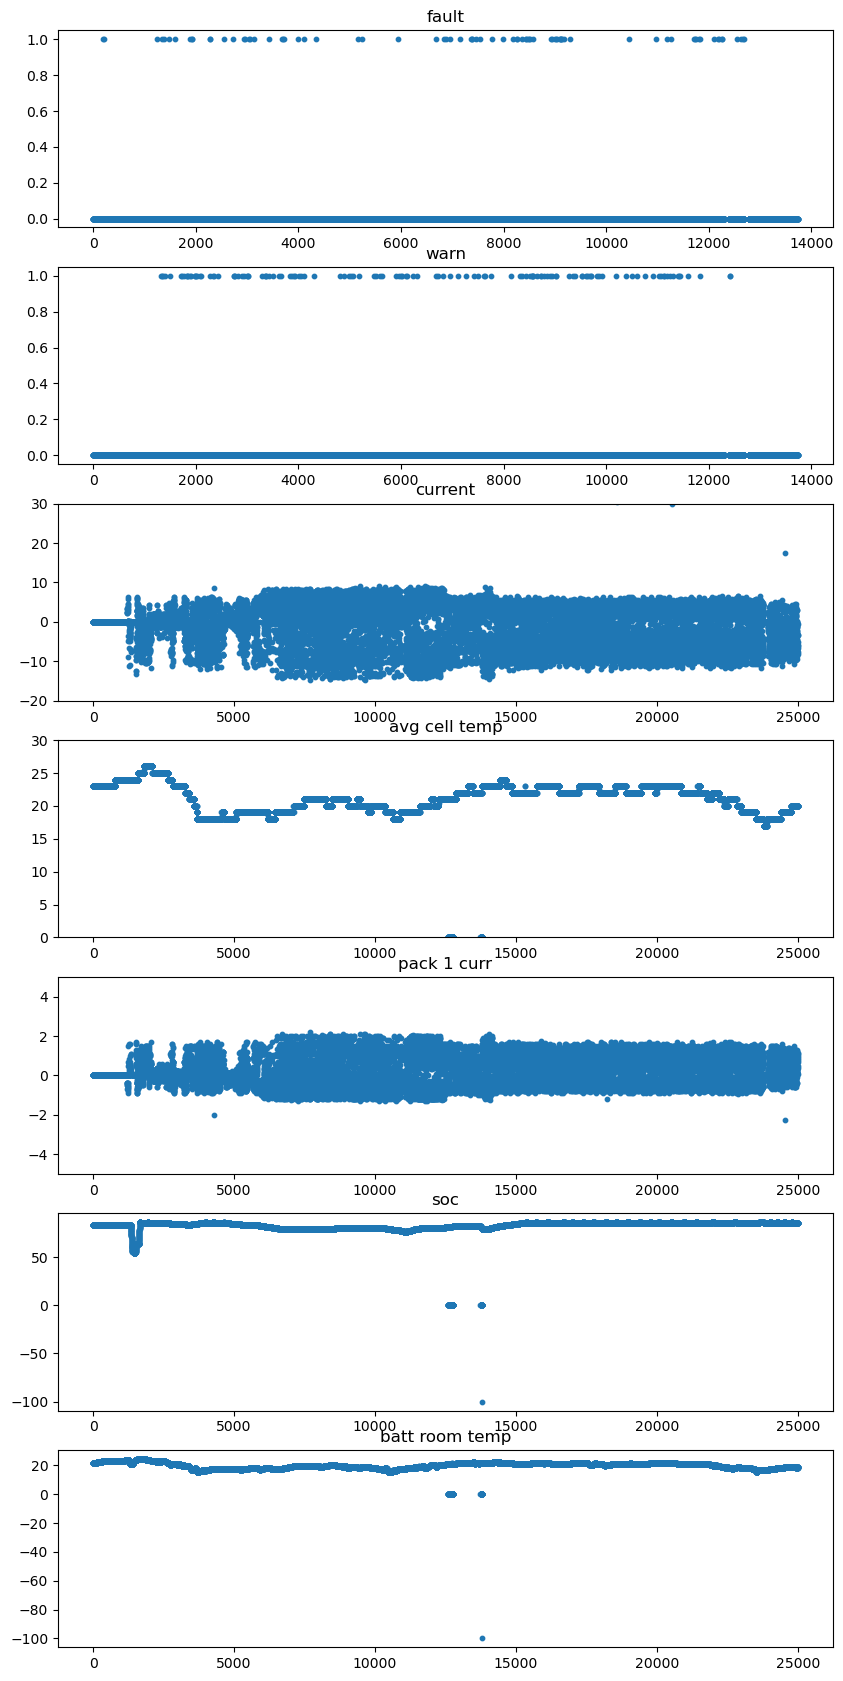

In [155]:
start = 115000
end = 140000
# start = 0
# end = len(df)

num_rows = 7
fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(10,3 * num_rows))

numerical_values0 = convert_values(df['BATT_PACK_1_FAULT'][start:end])
numerical_values1 = convert_values(df['BATT_PACK_1_WARN'][start:end])
numerical_values2 = df['Current'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values3 = df['PACK1_CRIDATA_AVG_CELL_TEMP'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values6 = df['PACK1_CRIDATA_CURR'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values8 = df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(-100)[start:end]
numerical_values9 = df['BATT_ROOM_TEMP'].cast(pl.Float32).fill_null(-100)[start:end]
axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault")

axs[1].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].set_title("warn")

axs[2].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].set_title("current")
axs[2].set_ylim(-20, 30)

axs[3].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[3].set_title("avg cell temp")
axs[3].set_ylim(0, 30)

axs[4].scatter(range(len(numerical_values6)), numerical_values6, s=10)
axs[4].set_title("pack 1 curr")
axs[4].set_ylim(-5, 5)

axs[5].scatter(range(len(numerical_values8)), numerical_values8, s=10)
axs[5].set_title("soc")

axs[6].scatter(range(len(numerical_values9)), numerical_values9, s=10)
axs[6].set_title("batt room temp")



In [105]:
start = 50000 + 70000 + 3000 
end = start + 1000

df['PACK1_CRIDATA_CURR'].cast(pl.Float32)[start:end].describe()

statistic,value
str,f64
"""count""",1000.0
"""null_count""",0.0
"""mean""",0.190974
"""std""",0.914956
"""min""",-1.19995
"""25%""",-0.699951
"""50%""",0.0
"""75%""",1.09998
"""max""",2.09998


In [129]:
# df.columns.index('PACK1_CRIDATA_BATT_VOL')
# df.columns.index('PACK1_CRIDATA_CURR')
df['RunningState'].describe()

statistic,value
str,i64
"""count""",273961
"""null_count""",6346
"""sum""",158353


Text(0.5, 1.0, 'warn 2')

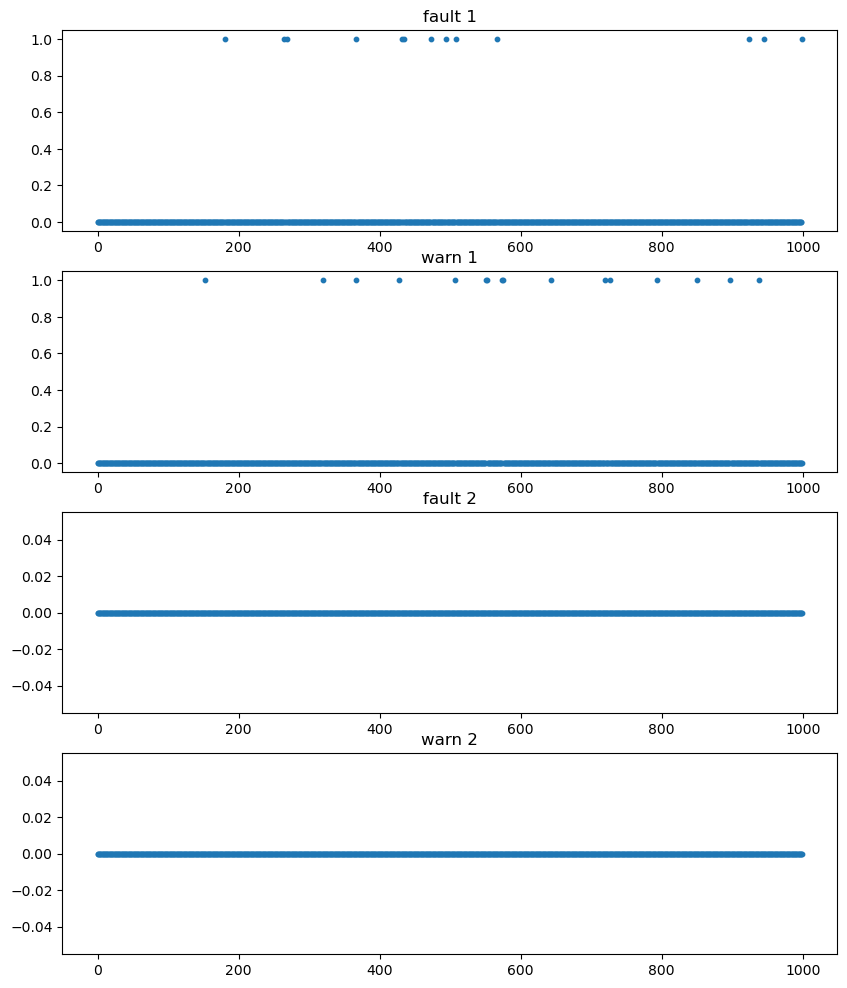

In [127]:
start = 50000 + 70000 + 3000
end = start + 1000

num_rows = 4
fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(10,3 * num_rows))

numerical_values0 = convert_values(df['BATT_PACK_1_FAULT'][start:end])
numerical_values1 = convert_values(df['BATT_PACK_1_WARN'][start:end])

numerical_values2 = convert_values(df['BATT_PACK_7_FAULT'][start:end])
numerical_values3 = convert_values(df['BATT_PACK_7_WARN'][start:end])

axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault 1")

axs[1].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].set_title("warn 1")

axs[2].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].set_title("fault 2")

axs[3].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[3].set_title("warn 2")

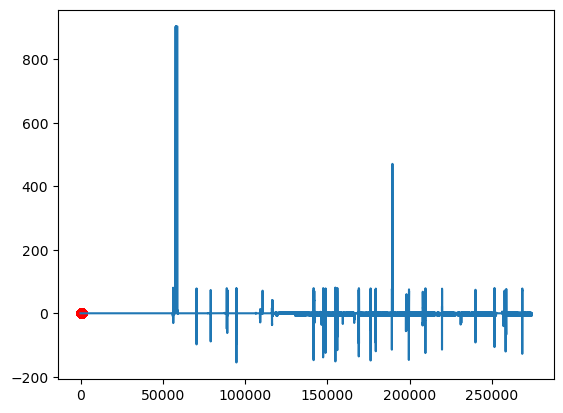

In [138]:
plt.plot(df['PACK1_CRIDATA_CURR'].cast(pl.Float64).fill_null(0))
plt.scatter(range(len(numerical_values0)), numerical_values0, color="r")

Text(0.5, 1.0, 'voltage')

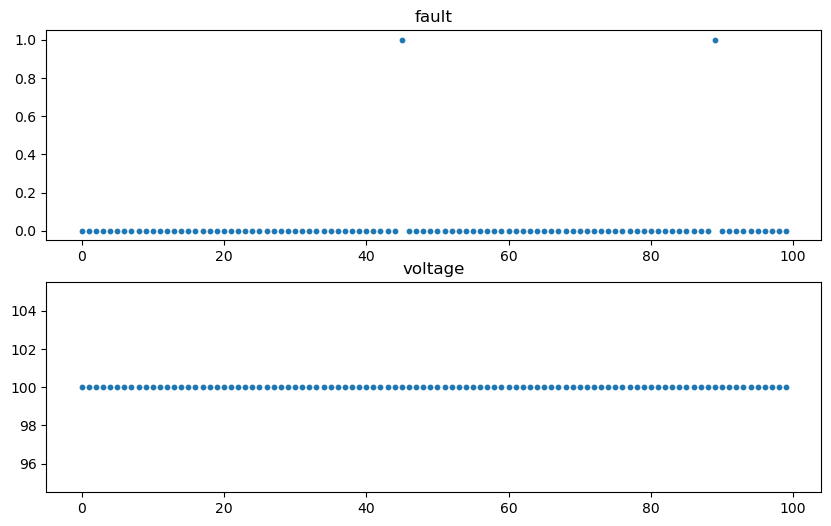

In [214]:
stepper = 0
start = 116300 + stepper
end = start + 100 + stepper
# start = 0
# end = len(df)
#

num_rows = 2
fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(10,3 * num_rows))

numerical_values0 = convert_values(df['BATT_PACK_1_FAULT'][start:end])
numerical_values1 = df['PACK1_CRIDATA_SOH'].cast(pl.Float32).fill_null(-100)[start:end]
axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault")
axs[1].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].set_title("voltage")



# identify train and test regions

In [ ]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import math
df = pl.read_csv('output.csv')

In [8]:
def convert_values(values):
    numerical_values = []
    for value in values:
        if value == 'False':
            numerical_values.append(0)
        elif value == 'True':
            numerical_values.append(1)
        else:
            # numerical_values.append(np.nan)
            numerical_values.append(-1)
    return numerical_values



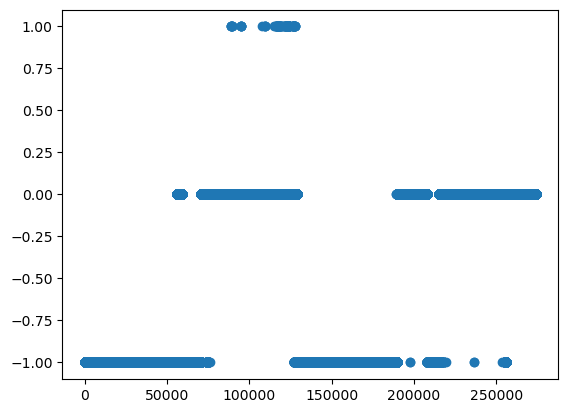

In [ ]:
fault = convert_values(df['BATT_PACK_1_FAULT'])
plt.scatter(range(len(fault)), fault)

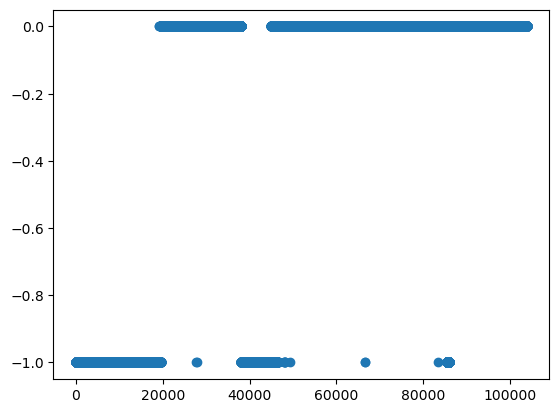

In [11]:
start = 170000
end = len(df)
window = fault[start:end]
plt.scatter(range(len(window)), window)

Text(0.5, 1.0, 'batt room temp')

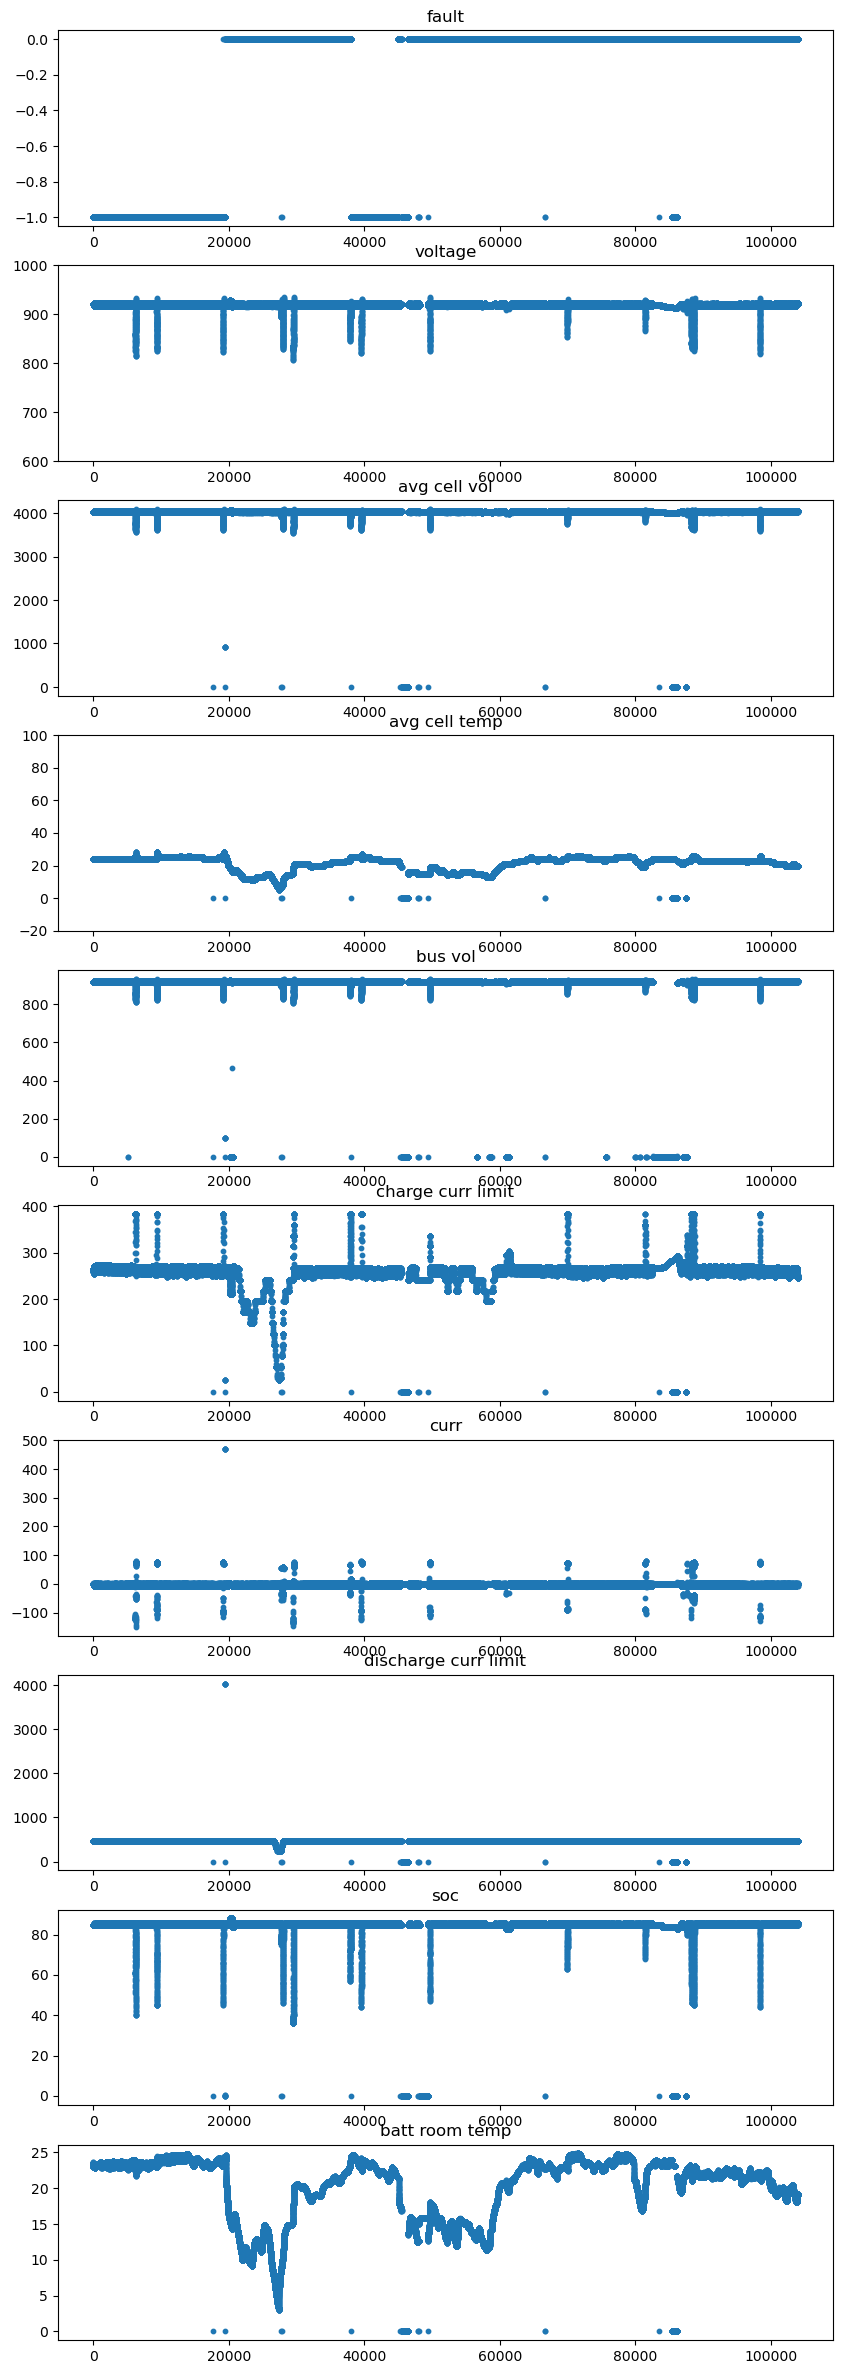

In [13]:
# start = 115000
# end = 140000
start = 170000
end = len(df)
#

num_rows = 10
fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(10,3 * num_rows))

numerical_values0 = convert_values(df['BATT_PACK_1_FAULT'][start:end])
numerical_values1 = df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32).fill_null(strategy="mean")[start:end]
numerical_values2 = df['PACK1_CRIDATA_AVG_CELL_VOL'].cast(pl.Float32).fill_null(strategy="mean")[start:end]
numerical_values3 = df['PACK1_CRIDATA_AVG_CELL_TEMP'].cast(pl.Float32).fill_null(strategy="mean")[start:end]
numerical_values4 = df['PACK1_CRIDATA_BUS_VOL'].cast(pl.Float32).fill_null(strategy="mean")[start:end]
numerical_values5 = df['PACK1_CRIDATA_CHARGE_CURR_LIMIT'].cast(pl.Float32).fill_null(strategy="mean")[start:end]
numerical_values6 = df['PACK1_CRIDATA_CURR'].cast(pl.Float32).fill_null(strategy="mean")[start:end]
numerical_values7 = df['PACK1_CRIDATA_DISCHARGE_CURR_LIMIT'].cast(pl.Float32).fill_null(strategy="mean")[start:end]
numerical_values8 = df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(strategy="mean")[start:end]
numerical_values9 = df['BATT_ROOM_TEMP'].cast(pl.Float32).fill_null(strategy="mean")[start:end]
axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault")
axs[1].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].set_title("voltage")
axs[1].set_ylim(600,1000)

axs[2].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].set_title("avg cell vol")

axs[3].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[3].set_title("avg cell temp")
axs[3].set_ylim(-20, 100)

axs[4].scatter(range(len(numerical_values4)), numerical_values4, s=10)
axs[4].set_title("bus vol")

axs[5].scatter(range(len(numerical_values5)), numerical_values5, s=10)
axs[5].set_title("charge curr limit")

axs[6].scatter(range(len(numerical_values6)), numerical_values6, s=10)
axs[6].set_title("curr")

axs[7].scatter(range(len(numerical_values7)), numerical_values7, s=10)
axs[7].set_title("discharge curr limit")

axs[8].scatter(range(len(numerical_values8)), numerical_values8, s=10)
axs[8].set_title("soc")

axs[9].scatter(range(len(numerical_values9)), numerical_values9, s=10)
axs[9].set_title("batt room temp")



we can reasonably assume that the data in this interval is without anomalies

The issue lies in removing the "0" data

Text(0.5, 1.0, 'temp with zeros')

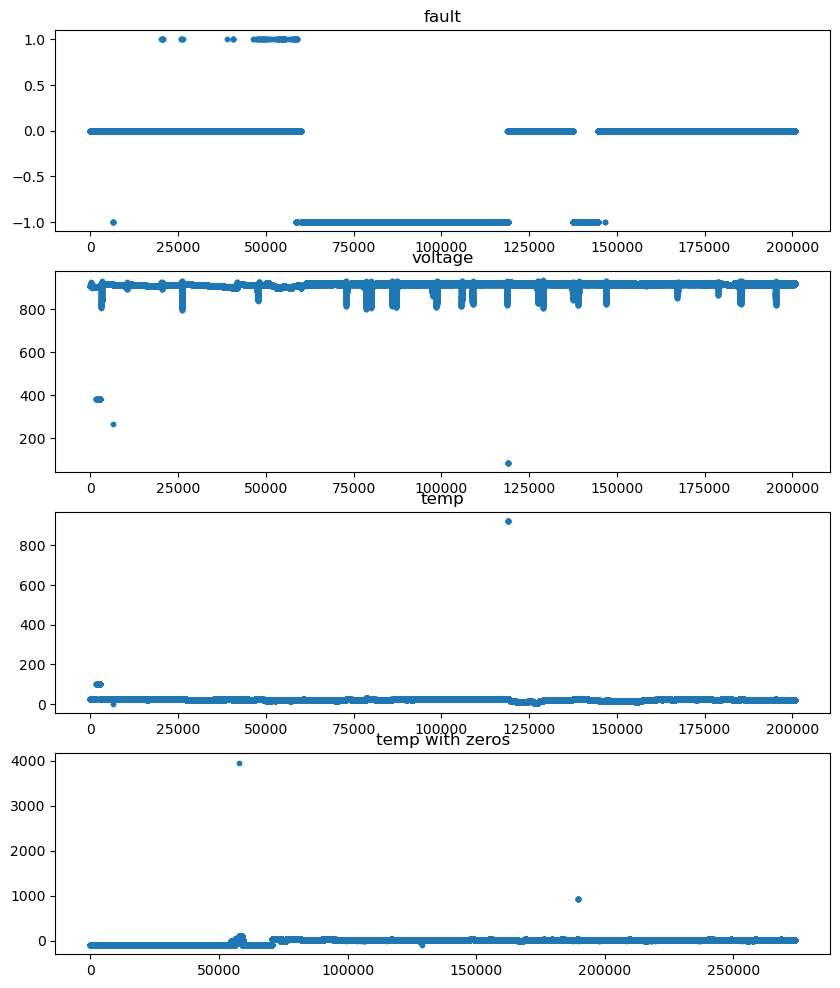

In [29]:
# start = 170000
# end = len(df)
start = 0

end = len(df)

num_rows = 4

fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(10,3 * num_rows))


numerical_values0 = convert_values((df['BATT_PACK_1_FAULT']
                                    .filter(df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32) != 0))
                                    [start:end])
numerical_values1 = (df['PACK1_CRIDATA_BATT_VOL']
                     .cast(pl.Float32)
                     .fill_null(strategy="mean")
                     .filter(df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32) != 0))[start:end]

numerical_values2 = (df['PACK1_CRIDATA_AVG_CELL_TEMP']
                     .cast(pl.Float32)
                     .fill_null(strategy="mean")
                     .filter(df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32) != 0))[start:end]


numerical_values3 = df['PACK1_CRIDATA_AVG_CELL_TEMP'].cast(pl.Float32).fill_null(-100)[start:end]

axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault")

axs[1].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].set_title("voltage")

axs[2].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].set_title("temp")

axs[3].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[3].set_title("temp with zeros")




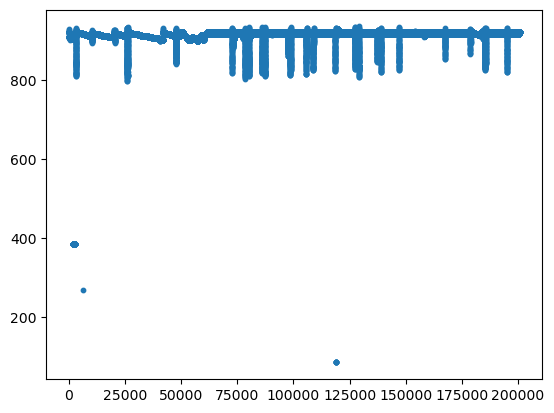

In [25]:
numerical_values1 = (df['PACK1_CRIDATA_BATT_VOL']
                     .cast(pl.Float32)
                     .fill_null(strategy="mean")
                     .filter(df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32) != 0))

plt.scatter(range(len(numerical_values1)), numerical_values1, s=10)


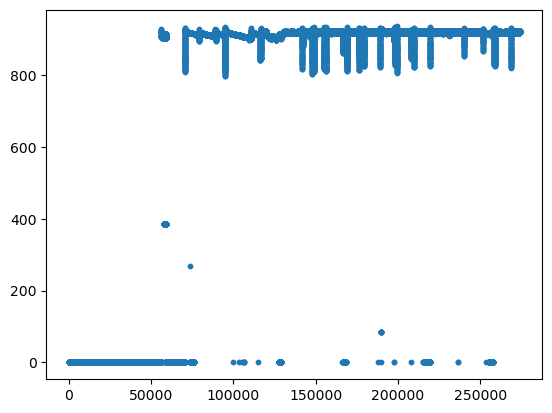

In [27]:
numerical_values1 = (df['PACK1_CRIDATA_BATT_VOL']
                     .cast(pl.Float32)
                     .fill_null(0))
                     

plt.scatter(range(len(numerical_values1)), numerical_values1, s=10)


Text(0.5, 1.0, 'batt room temp')

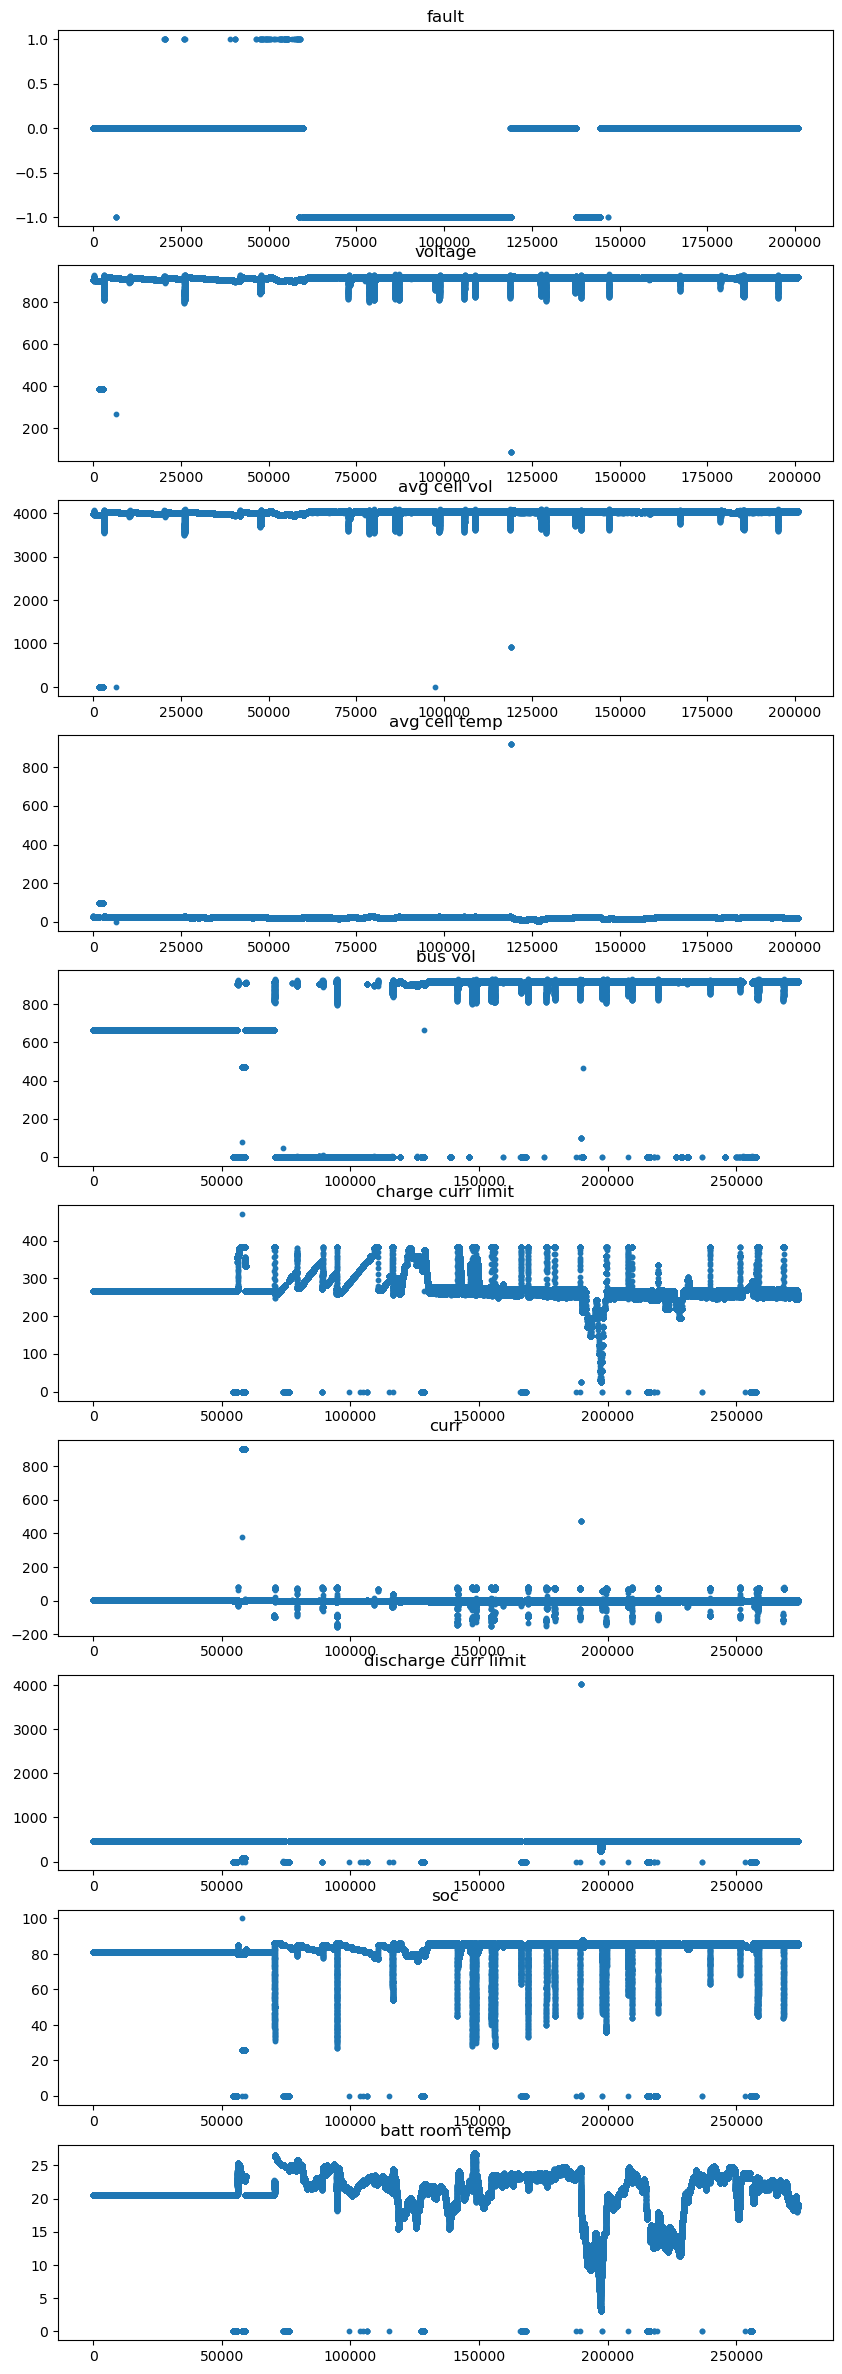

In [32]:
# start = 115000
# end = 140000
start = 0
end = len(df)
#

num_rows = 10
fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(10,3 * num_rows))

filter_condition = (df['PACK1_CRIDATA_BATT_VOL']
                    .cast(pl.Float32) != 0)

numerical_values0 = convert_values(df['BATT_PACK_1_FAULT']
                                   .filter(filter_condition)[start:end])
numerical_values1 = (df['PACK1_CRIDATA_BATT_VOL']
                     .filter(filter_condition)
                     .cast(pl.Float32)
                     .fill_null(strategy="mean"))[start:end]
numerical_values2 = (df['PACK1_CRIDATA_AVG_CELL_VOL']
                     .filter(filter_condition)
                     .cast(pl.Float32)
                     .fill_null(strategy="mean"))[start:end]
numerical_values3 = (df['PACK1_CRIDATA_AVG_CELL_TEMP']
                     .filter(filter_condition)
                     .cast(pl.Float32)
                     .fill_null(strategy="mean"))[start:end]
numerical_values4 = (df['PACK1_CRIDATA_BUS_VOL'].cast(pl.Float32).fill_null(strategy="mean"))[start:end]
numerical_values5 = (df['PACK1_CRIDATA_CHARGE_CURR_LIMIT'].cast(pl.Float32).fill_null(strategy="mean"))[start:end]
numerical_values6 = (df['PACK1_CRIDATA_CURR'].cast(pl.Float32).fill_null(strategy="mean"))[start:end]
numerical_values7 = (df['PACK1_CRIDATA_DISCHARGE_CURR_LIMIT'].cast(pl.Float32).fill_null(strategy="mean"))[start:end]
numerical_values8 = (df['PACK1_CRIDATA_SOC'].cast(pl.Float32).fill_null(strategy="mean"))[start:end]
numerical_values9 = (df['BATT_ROOM_TEMP'].cast(pl.Float32).fill_null(strategy="mean"))[start:end]
axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault")
axs[1].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].set_title("voltage")

axs[2].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].set_title("avg cell vol")

axs[3].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[3].set_title("avg cell temp")

axs[4].scatter(range(len(numerical_values4)), numerical_values4, s=10)
axs[4].set_title("bus vol")

axs[5].scatter(range(len(numerical_values5)), numerical_values5, s=10)
axs[5].set_title("charge curr limit")

axs[6].scatter(range(len(numerical_values6)), numerical_values6, s=10)
axs[6].set_title("curr")

axs[7].scatter(range(len(numerical_values7)), numerical_values7, s=10)
axs[7].set_title("discharge curr limit")

axs[8].scatter(range(len(numerical_values8)), numerical_values8, s=10)
axs[8].set_title("soc")

axs[9].scatter(range(len(numerical_values9)), numerical_values9, s=10)
axs[9].set_title("batt room temp")



# identifying contiguous variables

The objective of this section is to find all the variables of battery 1 and try to see if I can clean it up for multivariate data processing

In [1]:
import torch

import copy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from torch import nn, optim

import torch.nn.functional as F
import random
import datetime
# from arff2pandas import a2p

In [2]:
import polars as pl
from io import StringIO
import math
df = pl.read_csv('../data/battery_1.csv')

In [3]:
df.columns

['BATT_PACK_1_FAULT',
 'PACK1_CRIDATA_AVG_CELL_TEMP',
 'PACK1_CRIDATA_AVG_CELL_VOL',
 'PACK1_CRIDATA_BATT_VOL',
 'PACK1_CRIDATA_BUS_VOL',
 'PACK1_CRIDATA_CURR',
 'PACK1_CRIDATA_DISCHARGE_CURR_LIMIT',
 'PACK1_CRIDATA_SOC']

In [9]:
filter_condition =  df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32) != 0
# filter_condition = [ True ] * len(df)

voltage_data = (df['PACK1_CRIDATA_BATT_VOL']
                .filter(filter_condition)
                .cast(pl.Float32))

def convert_values(values):
    numerical_values = []
    for value in values:
        if value == 'False':
            numerical_values.append(0)
        elif value == 'True':
            numerical_values.append(1)
        else:
            # numerical_values.append(np.nan)
            numerical_values.append(-1)
    return numerical_values


fault_data = convert_values(df['BATT_PACK_1_FAULT']
                            .filter(filter_condition))


Text(0.5, 1.0, 'soc')

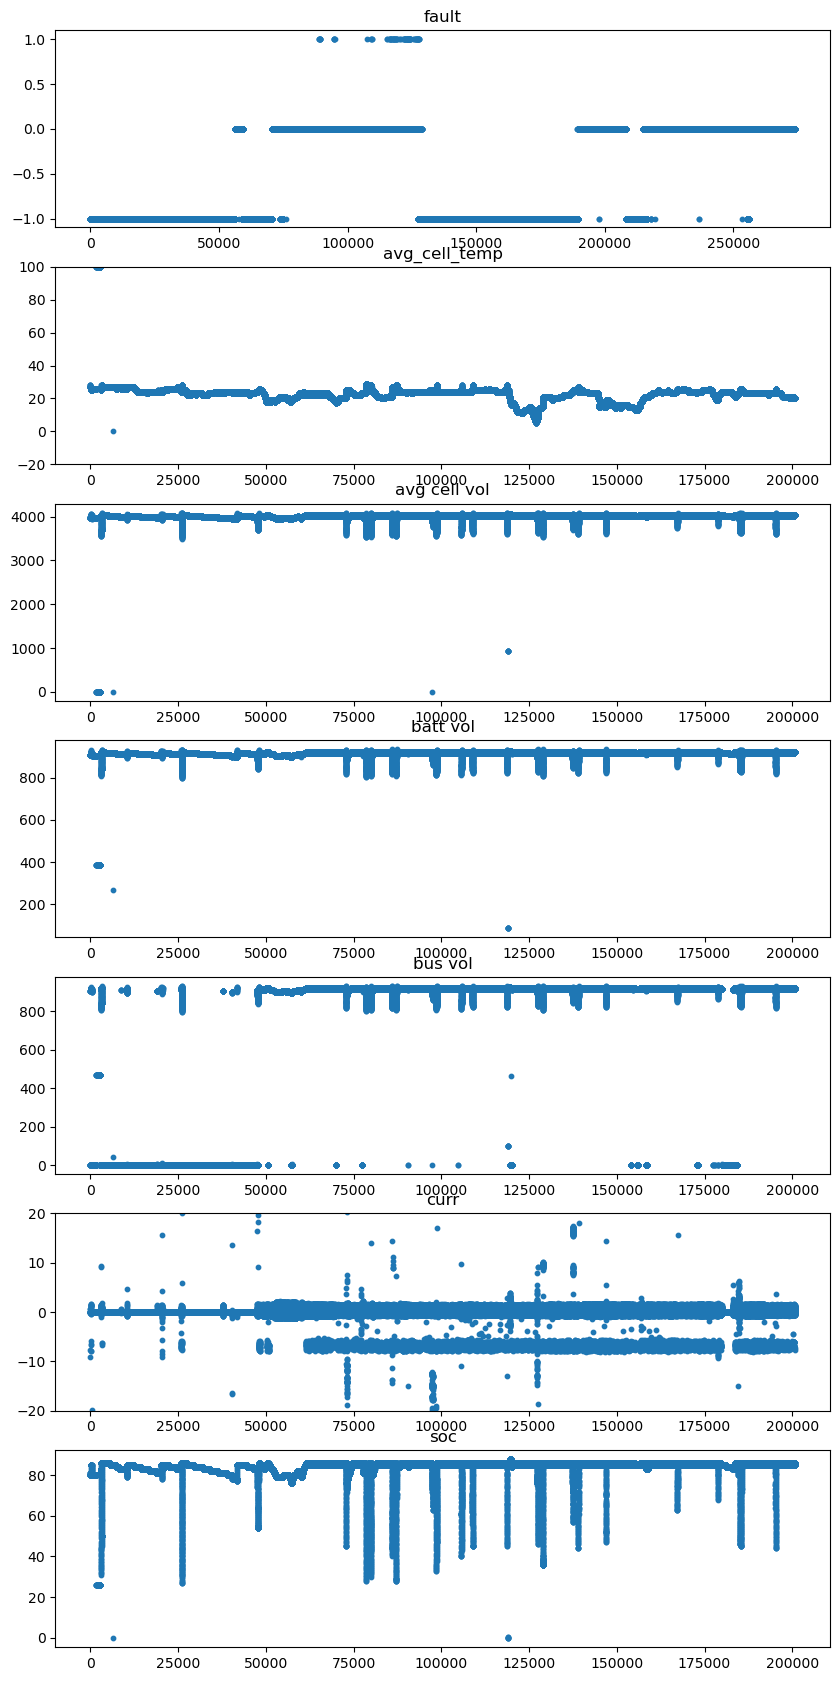

In [10]:
start = 0
end = len(df)
#

filter_condition =  df['PACK1_CRIDATA_BATT_VOL'].cast(pl.Float32) != 0
num_rows = 7
fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(10,3 * num_rows))

numerical_values0 = convert_values(df['BATT_PACK_1_FAULT'][start:end])
numerical_values1 = (df['PACK1_CRIDATA_AVG_CELL_TEMP']
                     .filter(filter_condition)
                     .cast(pl.Float32)
                     .fill_null(strategy="mean"))[start:end]
numerical_values2 = (df['PACK1_CRIDATA_AVG_CELL_VOL']
                     .filter(filter_condition)
                     .cast(pl.Float32)
                     .fill_null(strategy="mean"))[start:end]
numerical_values3 = (df['PACK1_CRIDATA_BATT_VOL']
                     .filter(filter_condition)
                     .cast(pl.Float32)
                     .fill_null(strategy="mean"))[start:end]
numerical_values4 = (df['PACK1_CRIDATA_BUS_VOL']
                     .filter(filter_condition)
                     .cast(pl.Float32)
                     .fill_null(strategy="mean"))[start:end]
numerical_values5 = (df['PACK1_CRIDATA_CURR']
                     .filter(filter_condition)
                     .cast(pl.Float32)
                     .fill_null(strategy="mean"))[start:end]
numerical_values6 = (df['PACK1_CRIDATA_SOC']
                     .filter(filter_condition)
                     .cast(pl.Float32)
                     .fill_null(strategy="mean"))[start:end]

axs[0].scatter(range(len(numerical_values0)), numerical_values0, s=10)
axs[0].set_title("fault")

axs[1].scatter(range(len(numerical_values1)), numerical_values1, s=10)
axs[1].set_title("avg_cell_temp")
axs[1].set_ylim(-20, 100)

axs[2].scatter(range(len(numerical_values2)), numerical_values2, s=10)
axs[2].set_title("avg cell vol")

axs[3].scatter(range(len(numerical_values3)), numerical_values3, s=10)
axs[3].set_title("batt vol")

axs[4].scatter(range(len(numerical_values4)), numerical_values4, s=10)
axs[4].set_title("bus vol")

axs[5].scatter(range(len(numerical_values5)), numerical_values5, s=10)
axs[5].set_title("curr")
axs[5].set_ylim(-20, 20)

axs[6].scatter(range(len(numerical_values6)), numerical_values6, s=10)
axs[6].set_title("soc")